In [1]:
# installing dependencies
!pip install eli5


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
# Reading the ablone dataset
data = pd.read_csv("https://raw.githubusercontent.com/Tanvivalkunde/dsem-ass-2/main/ames%20housing.csv")

In [4]:
# Viewing data in the file
data.head()

PID  MS_SubClass  Lot_Frontage  Lot_Area Street  Bldg_Type  \
0  527258010           20            88     11394   Pave          1   
1  533238045           20            57     12853   Pave          1   
2  906385020           20            64      7360   Pave          1   
3  528108120           60           102     12858   Pave          1   
4  528120060           20            83     10159   Pave          1   

   House_Style  Overall_Qual  Overall_Cond  Year_Built  ...  Full_Bath  \
0            1             9             2        2010  ...          1   
1            1             8             5        2010  ...          1   
2            1             7             5        2010  ...          2   
3            2             9             5        2009  ...          2   
4            1             9             5        2009  ...          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  TotRms_AbvGrd  Fireplaces  \
0          1              1              1              8           1   
1          1              1              1              6           1   
2          0              2              1              6           0   
3          1              3              1             10           1   
4          1              3              1              8           1   

   Garage_Area  Mo_Sold  Yr_Sold  SalePrice  
0          834        6     2010     394432  
1          852        4     2010     267916  
2          615        3     2010     187000  
3          751        1     2010     376162  
4          606        4     2010     395192  

[5 rows x 21 columns]

In [5]:
# checking if the any data is missing
data.isnull().sum()

PID              0
MS_SubClass      0
Lot_Frontage     0
Lot_Area         0
Street           0
Bldg_Type        0
House_Style      0
Overall_Qual     0
Overall_Cond     0
Year_Built       0
Gr_Liv_Area      0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
TotRms_AbvGrd    0
Fireplaces       0
Garage_Area      0
Mo_Sold          0
Yr_Sold          0
SalePrice        0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

<AxesSubplot: >

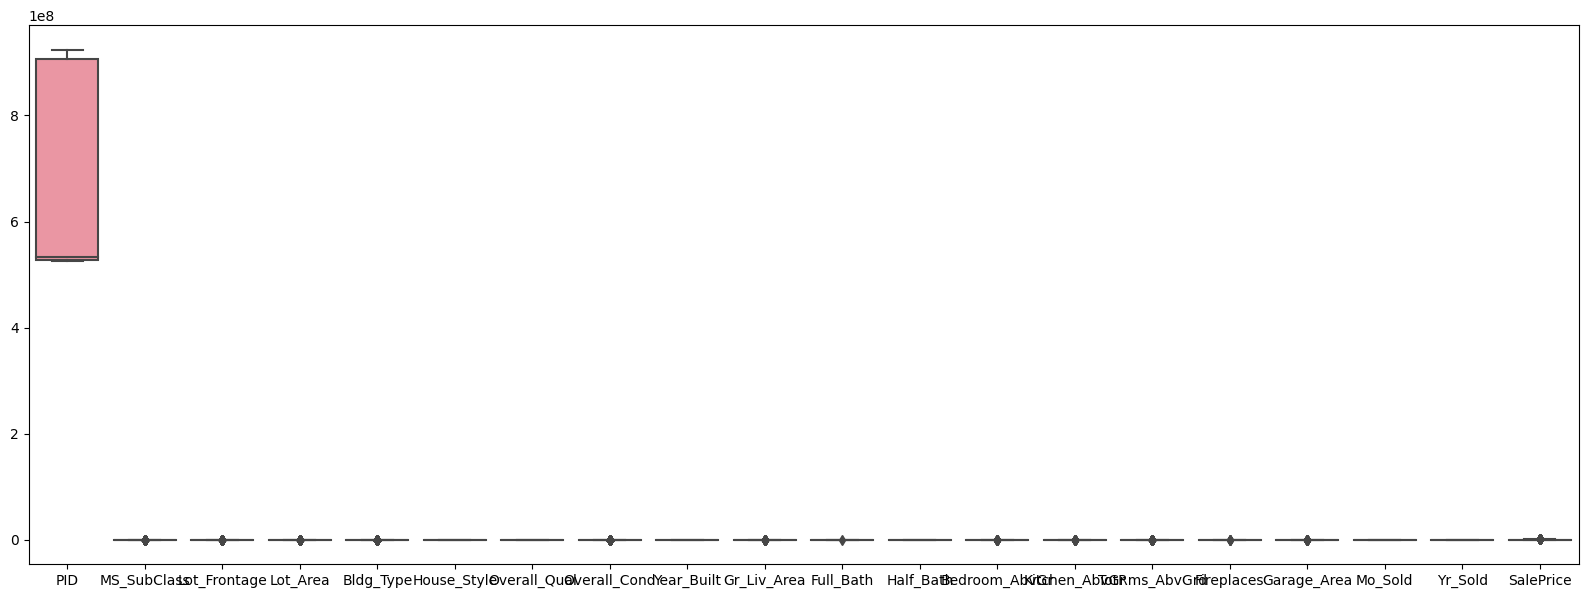

In [6]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

In [7]:
# checking the correlation between all the features in the data
data.corr()

C:\Users\Tanvi\AppData\Local\Temp\ipykernel_37804\641071566.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


PID  MS_SubClass  Lot_Frontage  Lot_Area  Bldg_Type  \
PID            1.000000    -0.137280     -0.007815  0.065313  -0.117729   
MS_SubClass   -0.137280     1.000000     -0.561508 -0.326358   0.851354   
Lot_Frontage  -0.007815    -0.561508      1.000000  0.458114  -0.594786   
Lot_Area       0.065313    -0.326358      0.458114  1.000000  -0.348911   
Bldg_Type     -0.117729     0.851354     -0.594786 -0.348911   1.000000   
House_Style   -0.080842     0.411901     -0.071071 -0.046783  -0.028968   
Overall_Qual  -0.188866    -0.004965      0.229470  0.158663  -0.002219   
Overall_Cond   0.010497    -0.124173     -0.007443 -0.034945  -0.096245   
Year_Built    -0.000035     0.037471      0.044179  0.009259   0.016826   
Gr_Liv_Area   -0.121054    -0.022035      0.424380  0.334941  -0.219050   
Full_Bath     -0.099848     0.061073      0.168756  0.107773  -0.035454   
Half_Bath     -0.111646     0.260781      0.005655  0.026524  -0.089835   
Bedroom_AbvGr  0.021261    -0.172932      0.298965  0.156055  -0.408145   
Kitchen_AbvGr  0.063688     0.108351      0.010029 -0.004293   0.127187   
TotRms_AbvGrd -0.093392    -0.120397      0.426193  0.285148  -0.339562   
Fireplaces    -0.142093    -0.061045      0.257422  0.260575  -0.070020   
Garage_Area   -0.073804    -0.232930      0.430554  0.269114  -0.236508   
Mo_Sold       -0.058926     0.013016     -0.001259  0.012023   0.003981   
Yr_Sold       -0.019368    -0.009618     -0.013879 -0.013998   0.019579   
SalePrice     -0.165874    -0.168209      0.368653  0.311008  -0.190492   

               House_Style  Overall_Qual  Overall_Cond  Year_Built  \
PID              -0.080842     -0.188866      0.010497   -0.000035   
MS_SubClass       0.411901     -0.004965     -0.124173    0.037471   
Lot_Frontage     -0.071071      0.229470     -0.007443    0.044179   
Lot_Area         -0.046783      0.158663     -0.034945    0.009259   
Bldg_Type        -0.028968     -0.002219     -0.096245    0.016826   
House_Style       1.000000      0.075454     -0.114292    0.150001   
Overall_Qual      0.075454      1.000000     -0.291932    0.688779   
Overall_Cond     -0.114292     -0.291932      1.000000   -0.441336   
Year_Built        0.150001      0.688779     -0.441336    1.000000   
Gr_Liv_Area       0.443029      0.609569     -0.242006    0.390268   
Full_Bath         0.278631      0.539325     -0.305569    0.606092   
Half_Bath         0.770015      0.070715     -0.111942    0.076203   
Bedroom_AbvGr     0.412985     -0.086306      0.000601   -0.121861   
Kitchen_AbvGr    -0.030892     -0.179712     -0.079129   -0.175849   
TotRms_AbvGrd     0.424446      0.413303     -0.193934    0.258859   
Fireplaces        0.072209      0.417055     -0.060958    0.148085   
Garage_Area      -0.005872      0.617785     -0.214428    0.475366   
Mo_Sold           0.003641      0.038859     -0.023237    0.002417   
Yr_Sold          -0.040288     -0.014589      0.016520   -0.007133   
SalePrice         0.073931      0.795092     -0.209887    0.546746   

               Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  \
PID              -0.121054  -0.099848  -0.111646       0.021261   
MS_SubClass      -0.022035   0.061073   0.260781      -0.172932   
Lot_Frontage      0.424380   0.168756   0.005655       0.298965   
Lot_Area          0.334941   0.107773   0.026524       0.156055   
Bldg_Type        -0.219050  -0.035454  -0.089835      -0.408145   
House_Style       0.443029   0.278631   0.770015       0.412985   
Overall_Qual      0.609569   0.539325   0.070715      -0.086306   
Overall_Cond     -0.242006  -0.305569  -0.111942       0.000601   
Year_Built        0.390268   0.606092   0.076203      -0.121861   
Gr_Liv_Area       1.000000   0.593839   0.404334       0.419586   
Full_Bath         0.593839   1.000000   0.043346       0.264695   
Half_Bath         0.404334   0.043346   1.000000       0.301870   
Bedroom_AbvGr     0.419586   0.264695   0.301870       1.000000   
Kitchen_AbvGr     0.066580   0.1045

C:\Users\Tanvi\AppData\Local\Temp\ipykernel_37804\4206621219.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<AxesSubplot: >

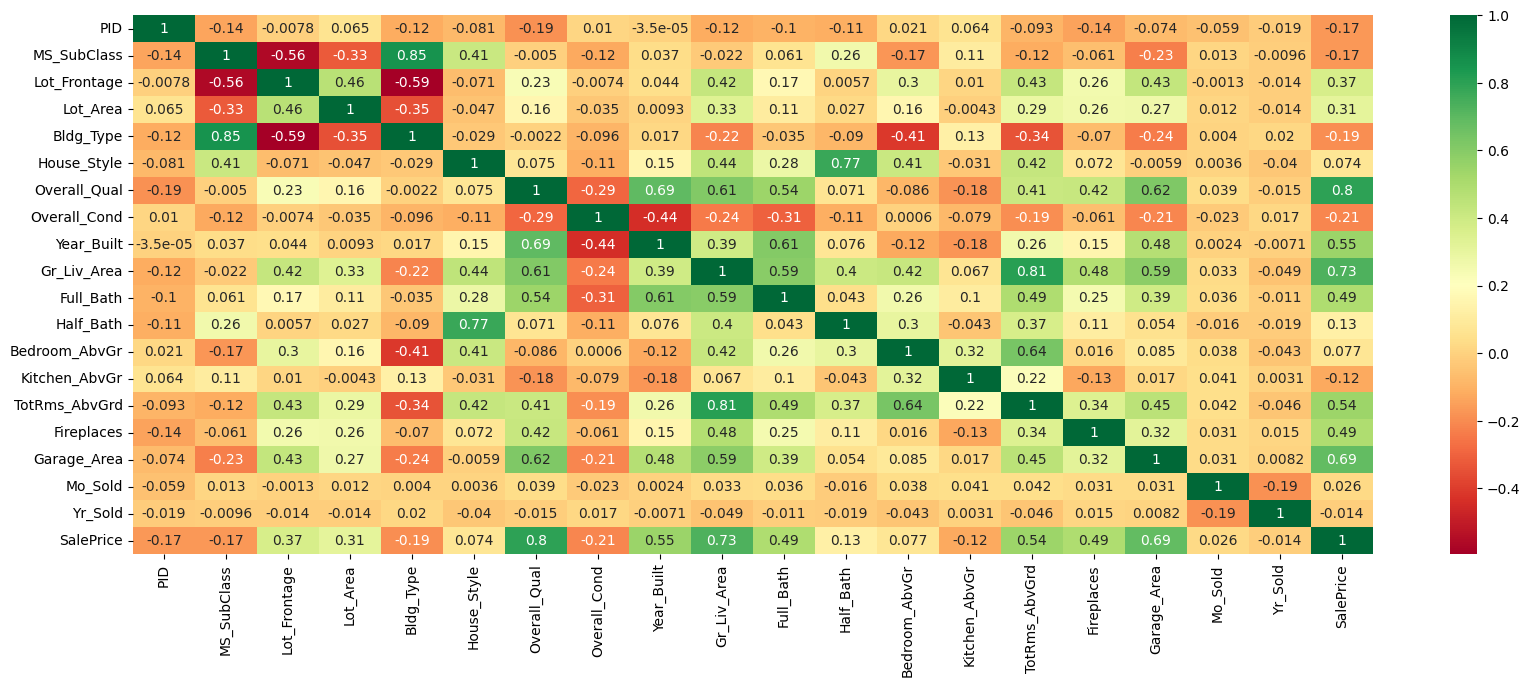

In [8]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

From The above Heat Map we can see that 'OverallQual','GrLivArea' are strongly correlated with 'SalePrice'

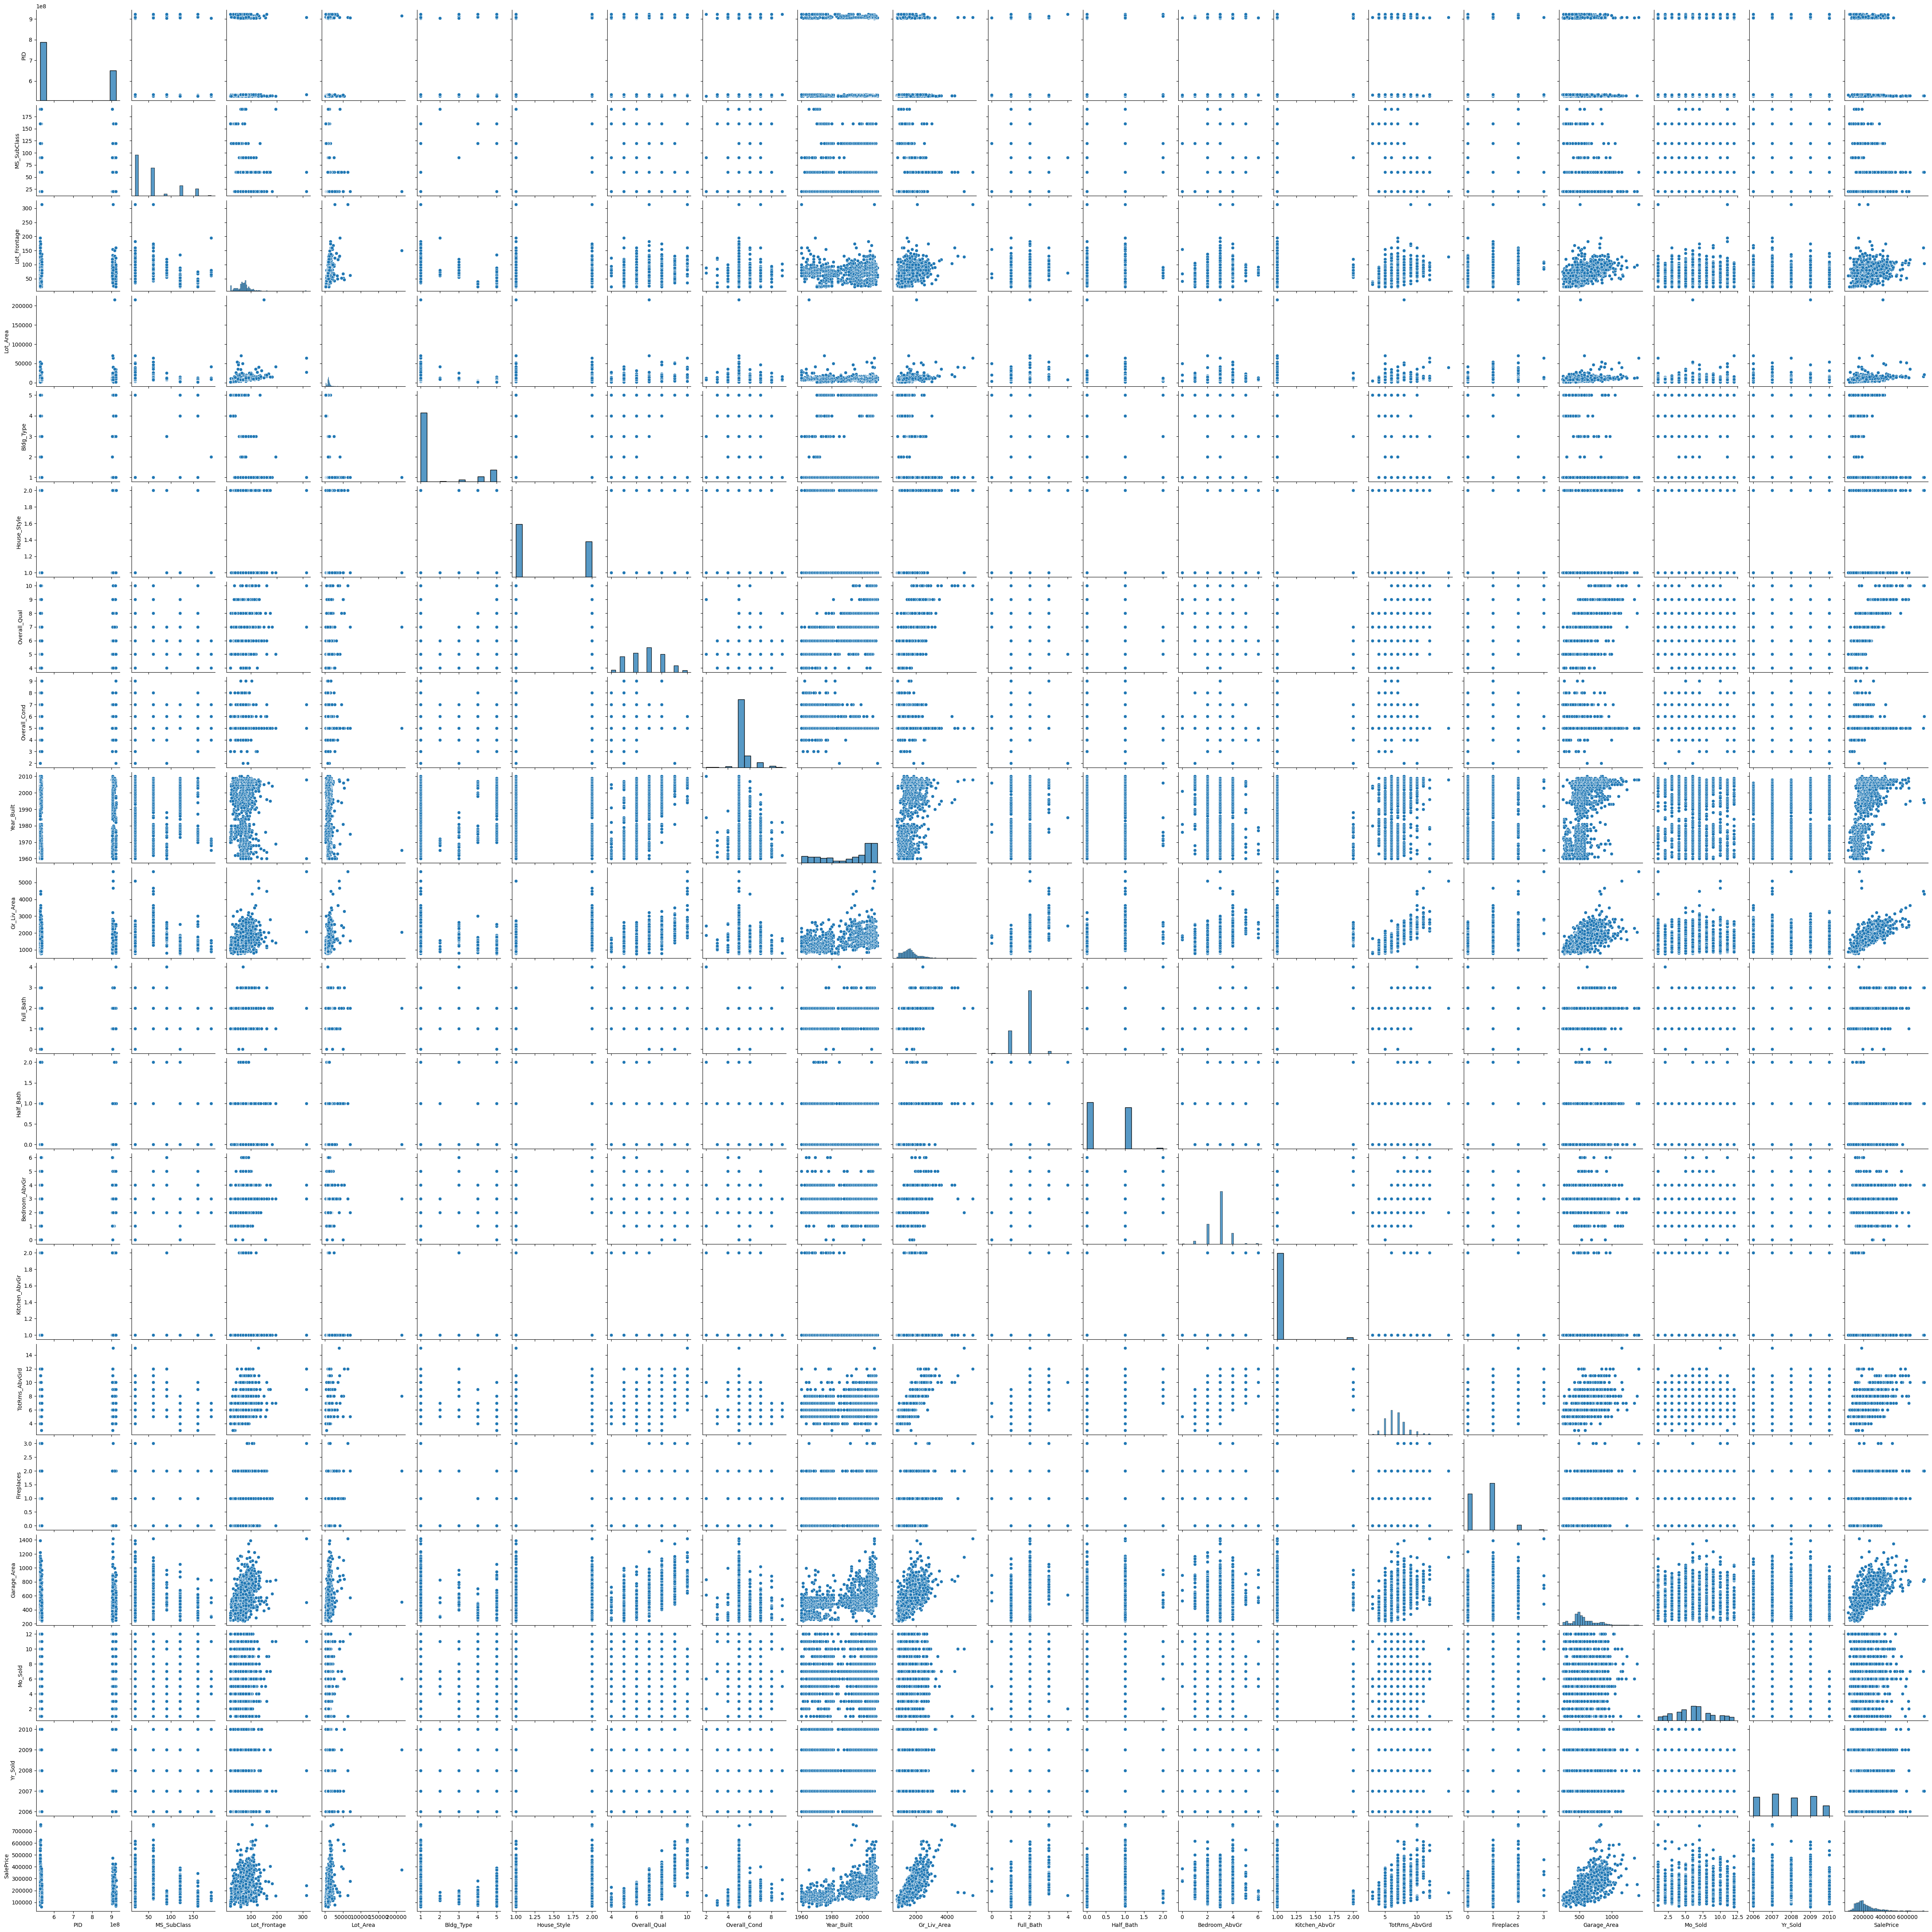

In [9]:
# pair plot to check the colinearity
sns.pairplot(data)

The highest correlation is between 'OverallQual','GrLivArea' with 'SalePrice'.

# Identifing predictor significance

In [10]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data["SalePrice"],
    data[
        [
            "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2290.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):                        0.00
Time:                        21:30:14   Log-Likelihood:                         -16272.
No. Observations:                1351   AIC:                                  3.258e+04
Df Residuals:                    1333   BIC:                                  3.267e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MS_SubClass     -62.7056     87.507     -0.717      0.474    -234.372     108.961
Lot_Frontage   -196.1050     64.071     -3.061      0.002    -321.796     -70.414
Lot_Area          0.5014      0.172      2.915      0.004       0.164       0.839
Bldg_Type     -2382.5586   2540.589     -0.938      0.349   -7366.547    2601.430
Year_Built      439.3087    125.496      3.501      0.000     193.117     685.500
House_Style   -3.294e+04   5717.464     -5.761      0.000   -4.42e+04   -2.17e+04
Overall_Qual   2.582e+04   1591.114     16.226      0.000    2.27e+04    2.89e+04
Overall_Cond   6024.8433   1822.396      3.306      0.001    2449.768    9599.919
Gr_Liv_Area      71.4489      5.476     13.048      0.000      60.707      82.191
Full_Bath     -3215.2604   3833.022     -0.839      0.402   -1.07e+04    4304.152
Half_Bath      8850.0017   3843.905      2.302      0.021    1309.239    1.64e+04
Bedroom_AbvGr -2528.8816   2498.927     -1.012      0.312   -7431.140    2373.376
Kitchen_AbvGr -3.183e+04   9503.405     -3.349      0.001   -5.05e+04   -1.32e+04
TotRms_AbvGrd  2508.4479   1550.620      1.618      0.106    -533.474    5550.370
Fireplaces     1.008e+04   2320.723      4.344      0.000    5529.629    1.46e+04
Garage_Area      69.9854      9.341      7.492      0.000      51.661      88.310
Mo_Sold        -202.5427    410.190     -0.494      0.622   -1007.230     602.145
Yr_Sold        -467.2572    123.960     -3.769      0.000    -710.435    -224.080
==============================================================================
Omnibus:                      795.223   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72711.104
Skew:                          -1.841   Prob(JB):                         0.00
Kurtosis:                      38.751   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is the summary output of a multiple linear regression model, where SalePrice is the dependent variable and the other 18 variables listed are independent variables that are being used to predict the SalePrice.

The R-squared value of 0.969 indicates that 96.9% of the variance in the dependent variable is explained by the independent variables in the model. The Adjusted R-squared value of 0.968 indicates that the model is not overfitting, and the F-statistic of 2290 with a p-value of 0.00 suggests that the model is statistically significant.

Each of the independent variables in the model is associated with a coefficient, standard error, t-value, p-value, and 95% confidence interval. The t-value measures the number of standard deviations that the coefficient estimate is from zero. A p-value less than 0.05 indicates that the variable is statistically significant in predicting the dependent variable

Some significant variables include Lot_Frontage, Year_Built, House_Style, Overall_Qual, Gr_Liv_Area, Half_Bath, Kitchen_AbvGr, Fireplaces, Garage_Area, and Yr_Sold, as they have a p-value less than 0.05.

However, other variables such as MS_SubClass, Bldg_Type, Full_Bath, Bedroom_AbvGr, TotRms_AbvGrd, and Mo_Sold are not significant in predicting the SalePrice, as their p-values are greater than 0.05.

The Omnibus test and Jarque-Bera (JB) test measure the normality assumption of the residuals, and the Durbin-Watson test measures the independence assumption of the residuals. A significant Omnibus and JB tests (p-value less than 0.05) suggest that the residuals are not normally distributed, and a value of the Durbin-Watson test between 1.5 and 2.5 indicates that there is no significant autocorrelation in the residuals.

# Building the Model
Train ,Validation and Test split

In [11]:
from sklearn.model_selection import train_test_split

X = data[
    [
        "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

y = data["SalePrice"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

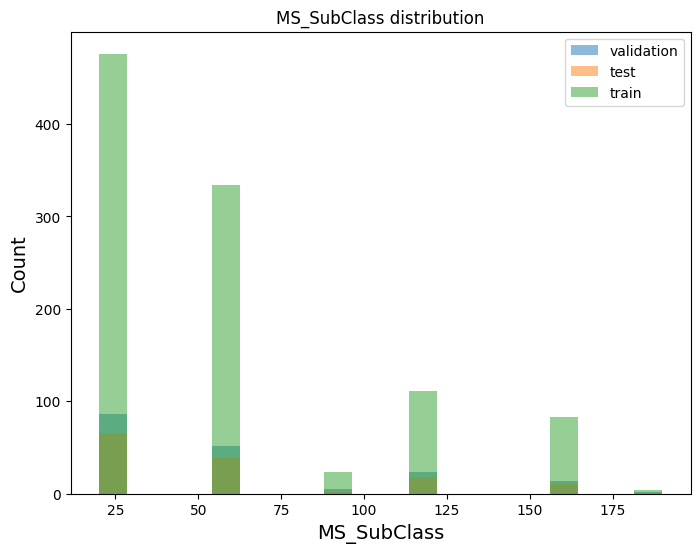

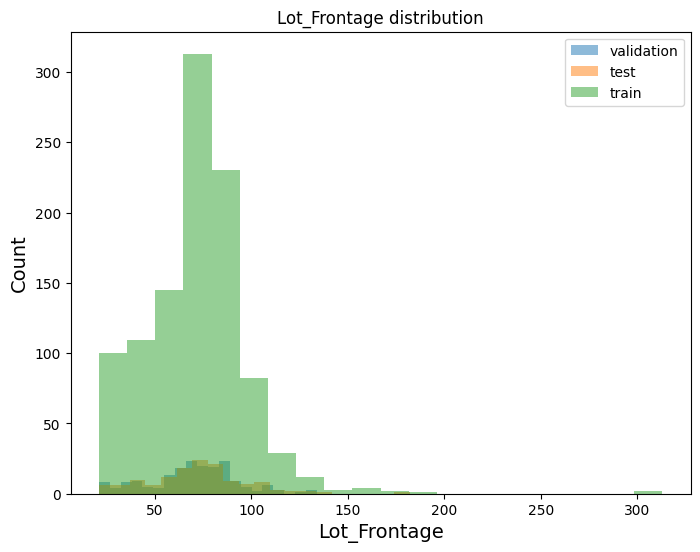

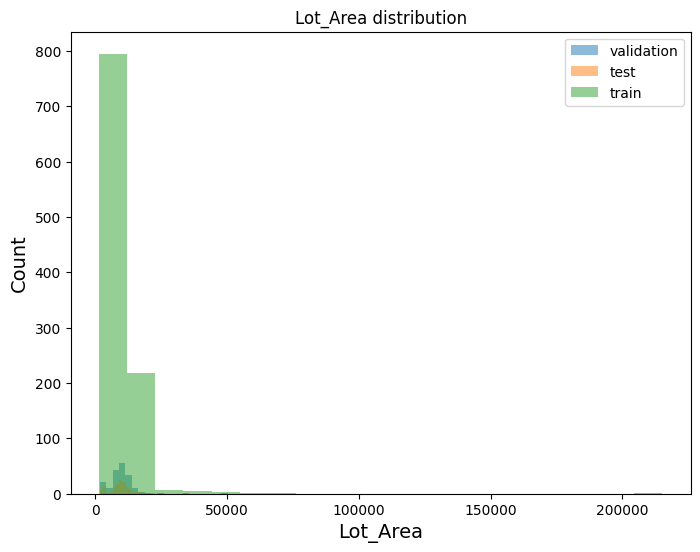

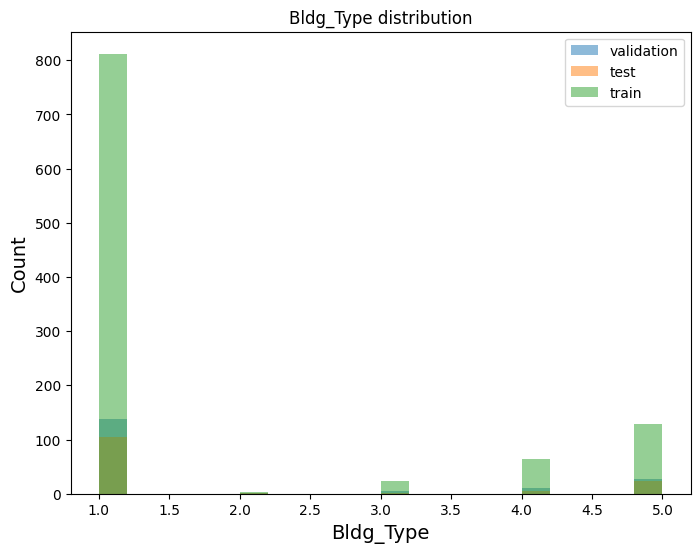

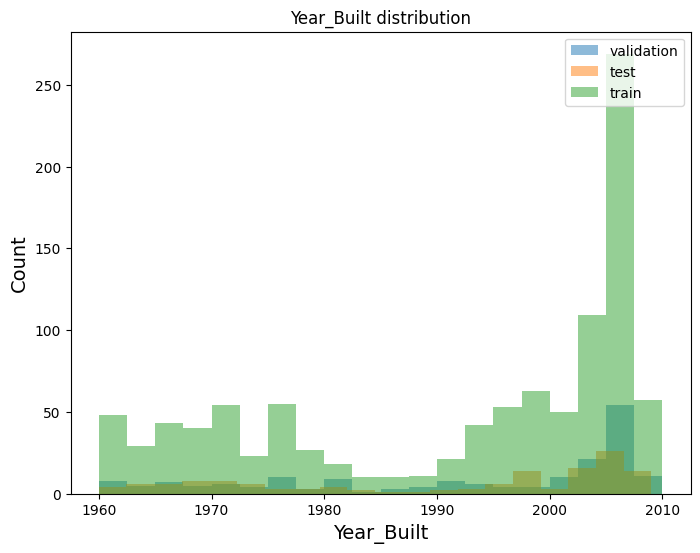

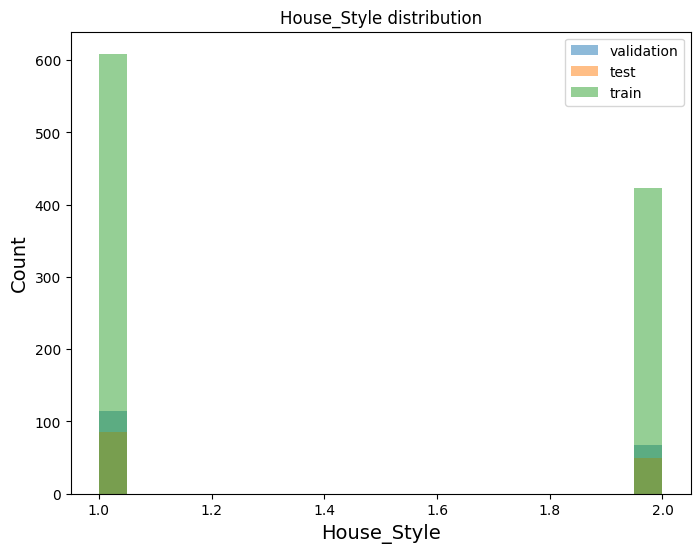

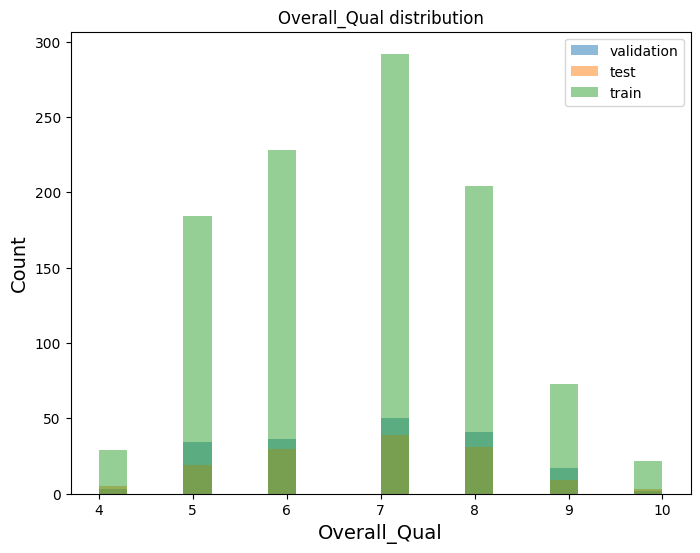

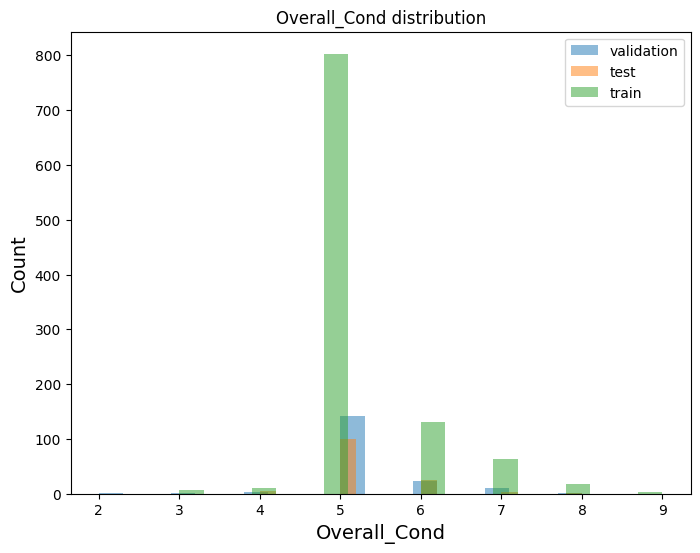

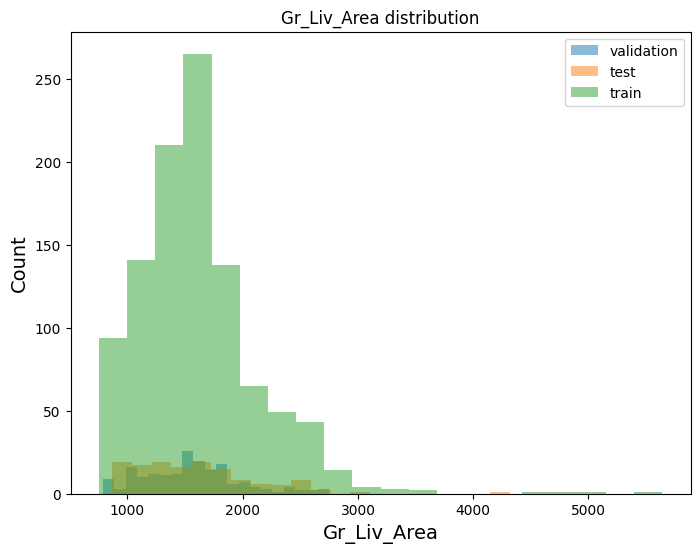

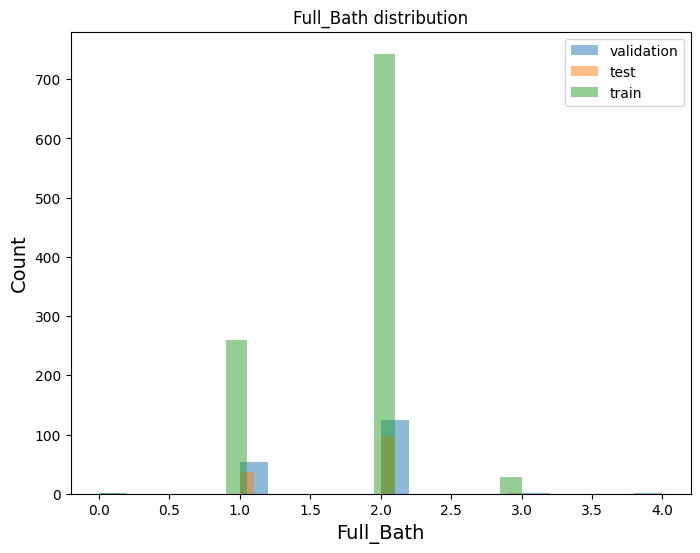

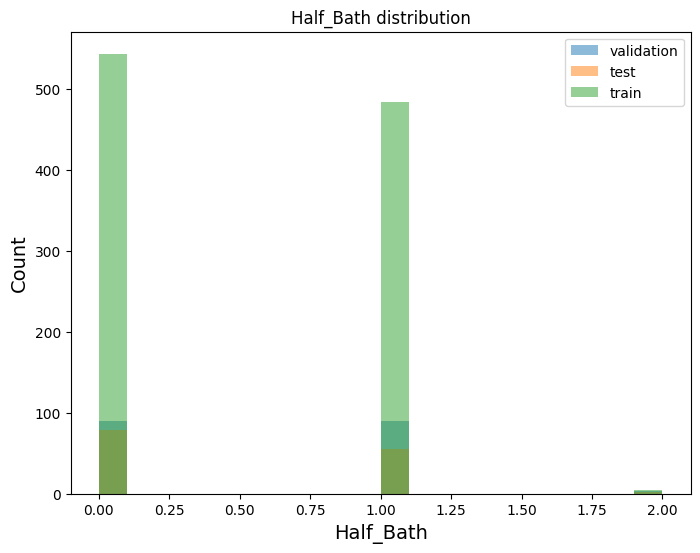

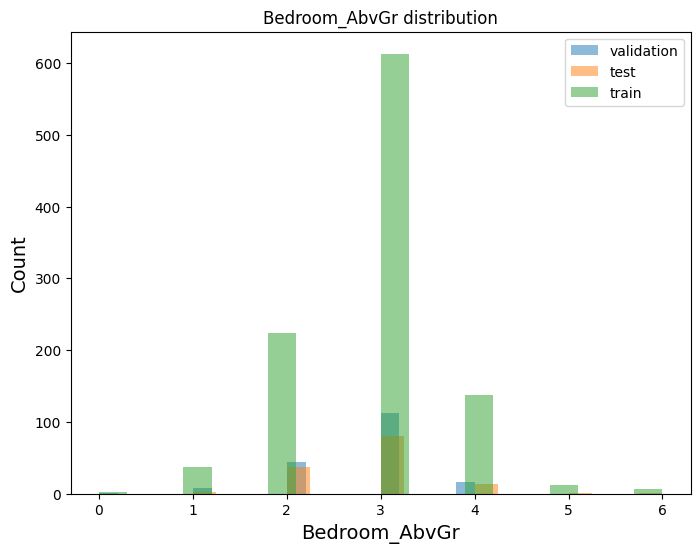

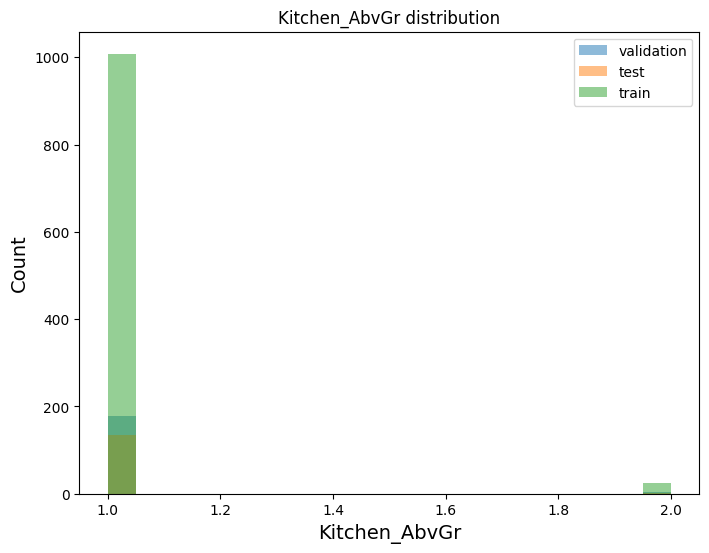

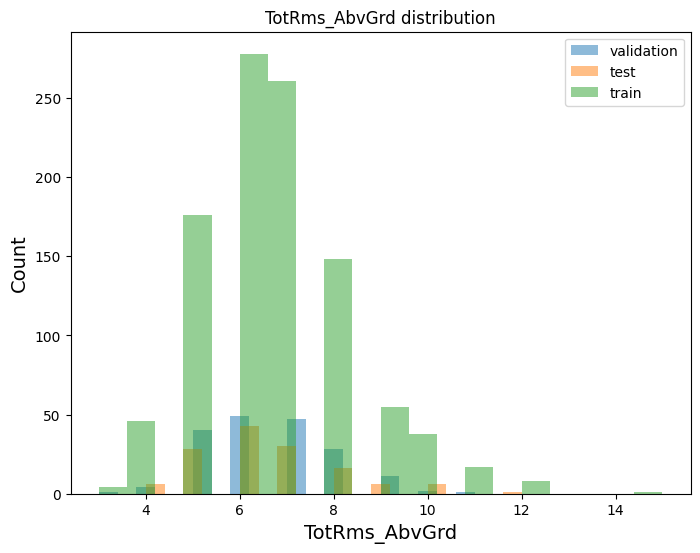

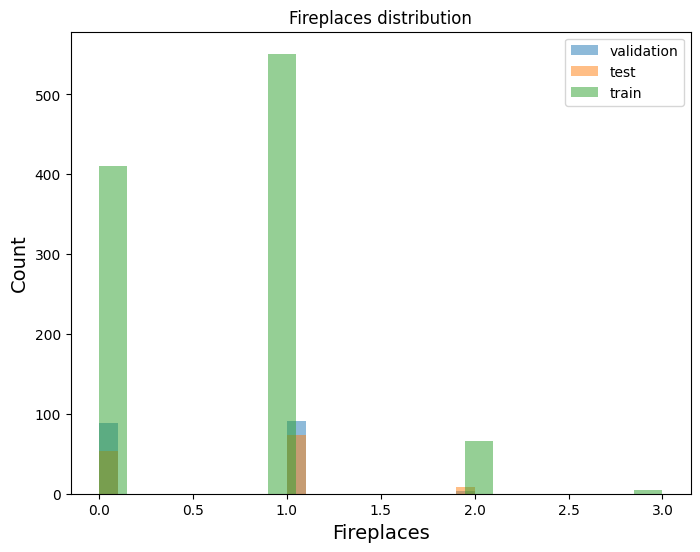

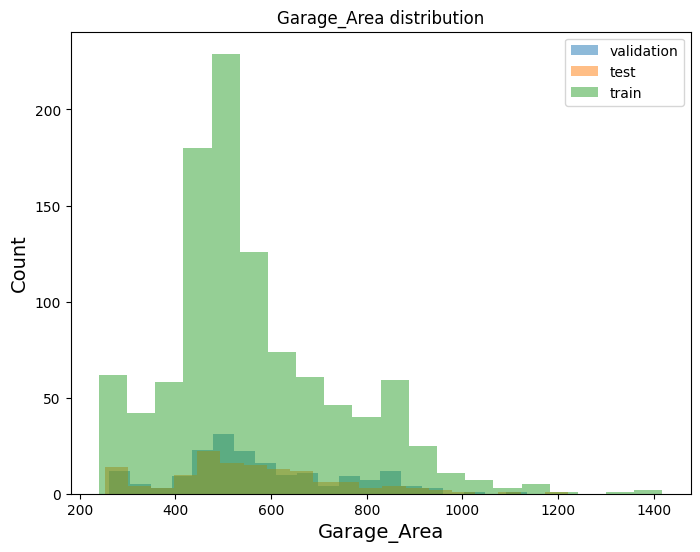

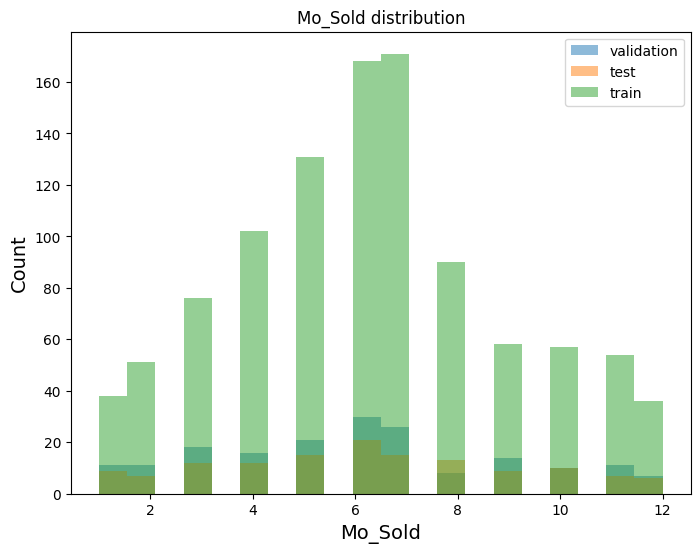

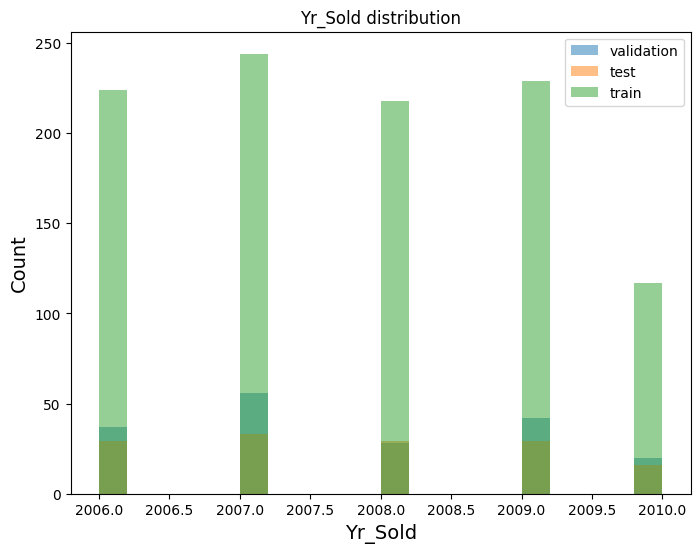

In [12]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
        "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

X_val_plot = X_val[
    [
       "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

X_train_plot = X_train[
    [
        "MS_SubClass",
            "Lot_Frontage",
            "Lot_Area",
            "Bldg_Type",
            "Year_Built",
            "House_Style",
            "Overall_Qual",
            "Overall_Cond",
            "Gr_Liv_Area",
            "Full_Bath",
            "Half_Bath",
            "Bedroom_AbvGr",
            "Kitchen_AbvGr",
            "TotRms_AbvGrd",
            "Fireplaces",
            "Garage_Area",
            "Mo_Sold",
            "Yr_Sold",
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

# Linear Regression

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

# Making predictions

In [15]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 1881940462.28
Coefficient of determination: 0.77
R^2 score on tarining set = 0.7671925922017


The given output indicates the performance of a regression model on a training set, where the mean squared error (MSE) is calculated as 1881940462.28, and the coefficient of determination (R-squared) is 0.77.

The mean squared error is a measure of how well the model is fitting the training data. It represents the average of the squared differences between the predicted values and the actual values. In this case, the MSE value of 1881940462.28 indicates that the model has a relatively high average error on the training set.

The coefficient of determination (R-squared) is a measure of how well the model explains the variability of the target variable. It represents the proportion of variance in the target variable that is explained by the independent variables in the model. In this case, an R-squared value of 0.77 indicates that the model is able to explain 77% of the variability in the target variable using the given independent variables.

Overall, the given output suggests that the regression model has moderate performance on the training set, with a relatively high average error but a moderate ability to explain the variability in the target variable. However, it is important to note that the performance of the model on the training set may not necessarily generalize well to new, unseen data, so further evaluation on a test set is needed to assess the model's true predictive power.

In [16]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 1271434451.23
Coefficient of determination: 0.85
R^2 score on test set = 0.8506865298770573


The mean squared error (MSE) of a regression model measures the average of the squared differences between the predicted values and the actual values. A lower value of MSE indicates a better fit of the model to the data.

The coefficient of determination (R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable (SalePrice) that is explained by the independent variables in the model. It ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating no correlation between the dependent and independent variables.

In this case, the MSE of the model on the test set is 1271434451.23, which is lower than the MSE on the training set. This indicates that the model is performing well on unseen data and is not overfitting to the training data.

The R-squared score on the test set is 0.85, which means that 85% of the variance in SalePrice is explained by the independent variables in the model. This is a good value and suggests that the model is a reasonably good fit for the data.

Overall, these metrics indicate that the model is performing well and is a good predictor of SalePrice based on the given independent variables. However, it is always important to further evaluate the model and consider additional factors before making any final conclusions or decisions

In [17]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 1039325694.54
Coefficient of determination: 0.84
R^2 score on validation set = 0.8418662895670923


The mean squared error (MSE) is a measure of the average squared difference between the predicted and actual values in the validation set. In this case, the MSE is 1039325694.54.

The coefficient of determination, or R-squared score, is a statistical measure that represents the proportion of the variance in the target variable (in this case, SalePrice) that can be explained by the independent variables in the model. An R-squared score of 0.84 indicates that approximately 84% of the variability in SalePrice can be explained by the independent variables in the model.

The R-squared score on the validation set of 0.8418662895670923 indicates that the model is performing well on unseen data and is able to generalize to new data. This score is similar to the R-squared score on the test set, which is a good sign that the model is not overfitting to the training set. Overall, these metrics suggest that the model is a good fit for the data and can make accurate predictions on new data.

# Understanding the important feature

In [18]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

The output shows the weight and feature importance as determined by Permutation Importance method. The higher the weight, the more important the feature is in predicting the target variable, i.e. SalePrice in this case.

The results suggest that the two most important features in predicting SalePrice are Overall_Qual and Gr_Liv_Area, with weights of 0.3203 and 0.3169 respectively. This is followed by Garage_Area and House_Style with weights of 0.0442 and 0.0415 respectively.

Other features that have some impact on predicting SalePrice but to a lesser extent are Fireplaces, Year_Built, TotRms_AbvGrd, Half_Bath, MS_SubClass, Lot_Area, Kitchen_AbvGr, Overall_Cond, Lot_Frontage, Full_Bath, Bldg_Type, Mo_Sold, Bedroom_AbvGr, and Yr_Sold.

It is important to note that the weights have an associated standard deviation, which is given after the ± sign. This provides an indication of the uncertainty in the estimated feature importance.

# What we learned from above is as follows:

1.Based on the permutation importance analysis, the most important independent variables (features) for predicting the target (dependent variable) are:

Overall_Qual Gr_Liv_Area Garage_Area House_Style Fireplaces Year_Built TotRms_AbvGrd Half_Bath These features have relatively high weights and their permutation caused the greatest decrease in the model's performance when they were removed.

2.No independent variables have any missing data or zeros.

3.most of the data are same in test, train and validation data set except the data points in training set are more and few boundary values are not included in train and validation data set.

4.Based on the provided correlation matrix, there are some variables that show high correlation with each other, which can be an indication of multicollinearity. For example, there is a high positive correlation between "MS_SubClass" and "Bldg_Type" (0.85), as well as between "Gr_Liv_Area" and "TotRms_AbvGrd" (0.83). Additionally, there is a moderate positive correlation between "Year_Built" and "Overall_Qual" (0.69).

So to conclude, No, they are not independet of each other

Ranking wise the predictor variables that are most important are as follows: 1.Overall_Qual

Gr_Liv_Area
Garage_Area
House_Style
Fireplaces
Year_Built
TotRms_AbvGrd
Half_Bath
MS_SubClass
Lot_Area
Kitchen_AbvGr
Overall_Cond
Lot_Frontage
Full_Bath
Bldg_Type
Mo_Sold
Bedroom_AbvGr
Yr_Sold

# H20 AutoML Ames Housing Regression

# Importing required Libraries and H20 Initialization

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

ModuleNotFoundError: No module named 'yellowbrick'

In [4]:
min_mem_size=6 
run_time=222

In [5]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [6]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:44821..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.16.1+1-LTS-1, mixed mode)
  Starting server from C:\Users\Tanvi\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Tanvi\AppData\Local\Temp\tmpj_6v_olm
  JVM stdout: C:\Users\Tanvi\AppData\Local\Temp\tmpj_6v_olm\h2o_Tanvi_started_from_python.out
  JVM stderr: C:\Users\Tanvi\AppData\Local\Temp\tmpj_6v_olm\h2o_Tanvi_started_from_python.err
  Server is running at http://127.0.0.1:44821
Connecting to H2O server at http://127.0.0.1:44821 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    2 months and 1 day
H2O_cluster_name:           H2O_from_python_Tanvi_u87r4q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.926 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:44821
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.0 final
--------------------------  -----------------------------

# Importing Data

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [7]:
url = "https://raw.githubusercontent.com/Tanvivalkunde/dsem-ass-2/main/ames%20housing.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/Tanvivalkunde/dsem-ass-2/main/ames%20housing.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
dff.head()

PID  MS_SubClass  Lot_Frontage  Lot_Area Street  Bldg_Type  \
0  527258010           20            88     11394   Pave          1   
1  533238045           20            57     12853   Pave          1   
2  906385020           20            64      7360   Pave          1   
3  528108120           60           102     12858   Pave          1   
4  528120060           20            83     10159   Pave          1   

   House_Style  Overall_Qual  Overall_Cond  Year_Built  ...  Full_Bath  \
0            1             9             2        2010  ...          1   
1            1             8             5        2010  ...          1   
2            1             7             5        2010  ...          2   
3            2             9             5        2009  ...          2   
4            1             9             5        2009  ...          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  TotRms_AbvGrd  Fireplaces  \
0          1              1              1              8           1   
1          1              1              1              6           1   
2          0              2              1              6           0   
3          1              3              1             10           1   
4          1              3              1              8           1   

   Garage_Area  Mo_Sold  Yr_Sold  SalePrice  
0          834        6     2010     394432  
1          852        4     2010     267916  
2          615        3     2010     187000  
3          751        1     2010     376162  
4          606        4     2010     395192  

[5 rows x 21 columns]

In [9]:
dff.describe()

PID  MS_SubClass  Lot_Frontage       Lot_Area    Bldg_Type  \
count  1.351000e+03  1351.000000   1351.000000    1351.000000  1351.000000   
mean   6.590659e+08    57.483346     71.096225   10050.164323     1.756477   
std    1.803841e+08    45.242093     26.112258    7733.063265     1.473942   
min    5.263011e+08    20.000000     21.000000    1300.000000     1.000000   
25%    5.281745e+08    20.000000     60.000000    7800.000000     1.000000   
50%    5.324790e+08    60.000000     72.000000    9650.000000     1.000000   
75%    9.063981e+08    60.000000     84.000000   11700.000000     1.000000   
max    9.241520e+08   190.000000    313.000000  215245.000000     5.000000   

       House_Style  Overall_Qual  Overall_Cond   Year_Built  Gr_Liv_Area  \
count  1351.000000   1351.000000   1351.000000  1351.000000  1351.000000   
mean      1.400444      6.760178      5.273131  1991.547742  1601.815692   
std       0.490170      1.336745      0.710876    16.015193   505.048620   
min       1.000000      4.000000      2.000000  1960.000000   752.000000   
25%       1.000000      6.000000      5.000000  1976.000000  1257.000000   
50%       1.000000      7.000000      5.000000  1999.000000  1552.000000   
75%       2.000000      8.000000      5.000000  2005.000000  1825.000000   
max       2.000000     10.000000      9.000000  2010.000000  5642.000000   

         Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  TotRms_AbvGrd  \
count  1351.000000  1351.000000    1351.000000    1351.000000    1351.000000   
mean      1.761658     0.480385       2.857883       1.022206       6.669134   
std       0.487817     0.514407       0.764351       0.147407       1.552323   
min       0.000000     0.000000       0.000000       1.000000       3.000000   
25%       1.000000     0.000000       2.000000       1.000000       6.000000   
50%       2.000000     0.000000       3.000000       1.000000       7.000000   
75%       2.000000     1.000000       3.000000       1.000000       7.500000   
max       4.000000     2.000000       6.000000       2.000000      15.000000   

        Fireplaces  Garage_Area      Mo_Sold      Yr_Sold      SalePrice  
count  1351.000000  1351.000000  1351.000000  1351.000000    1351.000000  
mean      0.656551   562.615840     6.242783  2007.772761  214972.551443  
std       0.602857   181.235982     2.761691     1.315221   89051.153584  
min       0.000000   240.000000     1.000000  2006.000000   62383.000000  
25%       0.000000   449.500000     4.000000  2007.000000  154252.000000  
50%       1.000000   527.000000     6.000000  2008.000000  192000.000000  
75%       1.000000   660.000000     8.000000  2009.000000  252000.000000  
max       3.000000  1418.000000    12.000000  2010.000000  755000.000000

This table shows summary statistics for a dataset with 1351 observations and 21 variables.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on

In [10]:
df.types

{'PID': 'int',
 'MS_SubClass': 'int',
 'Lot_Frontage': 'int',
 'Lot_Area': 'int',
 'Street': 'enum',
 'Bldg_Type': 'int',
 'House_Style': 'int',
 'Overall_Qual': 'int',
 'Overall_Cond': 'int',
 'Year_Built': 'int',
 'Gr_Liv_Area': 'int',
 'Full_Bath': 'int',
 'Half_Bath': 'int',
 'Bedroom_AbvGr': 'int',
 'Kitchen_AbvGr': 'int',
 'TotRms_AbvGrd': 'int',
 'Fireplaces': 'int',
 'Garage_Area': 'int',
 'Mo_Sold': 'int',
 'Yr_Sold': 'int',
 'SalePrice': 'int'}

In [11]:
df.shape

(1351, 21)

In [12]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [13]:
print(df_train.shape)
print(df_test.shape)

(1095, 21)
(256, 21)


In [14]:
#Display all columns in X
X=df.columns
print(X)

['PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Street', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area', 'Mo_Sold', 'Yr_Sold', 'SalePrice']


In [15]:
#Seperate Dependent variable from Independent variable
y_numeric ='SalePrice'
X.remove(y_numeric) 
print(X)

['PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Street', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area', 'Mo_Sold', 'Yr_Sold']


In [16]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/Tanvivalkunde/dsem-ass-2/main/ames%20housing.csv")

# H20 AutoML Execution

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [17]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [18]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)  

AutoML progress: |
22:03:15.779: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_5_AutoML_1_20230409_220315


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       2/5
# GBM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 48914572.47073884
RMSE: 6993.895371732326
MAE: 4979.790282694668
RMSLE: 0.03386127000547901
Mean Residual Deviance: 48914572.47073884
R^2: 0.9935209105868751
Null degrees of freedom: 1094
Residual degrees of freedom: 1092
Null deviance: 8266818597526.671
Residual deviance: 53561456855.45903
AIC: 22503.091965285836

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 909668553.6818837
RMSE: 30160.712088441873
MAE: 18727.382773864974
RMSLE: 0.12080317021363657
Mean Residual Deviance: 909668553.6818837
R^2: 0.8795078113145389
Null degrees of freedom: 1094
Residual degrees of freedom: 1090
Null deviance: 8274232736688.821
Residual deviance: 996087066281.6626
AIC: 25707.78238424204

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     18715.2      2014.68      18811         17740.4       16570.3       21974.1       18480.1
mean_residual_deviance  9.07897e+08  3.54239e+08  9.81606e+08   6.73115e+08   4.98065e+08   1.42836e+09   9.58341e+08
mse                     9.07897e+08  3.54239e+08  9.81606e+08   6.73115e+08   4.98065e+08   1.42836e+09   9.58341e+08
null_deviance           1.65485e+12  2.81011e+11  1.93149e+12   1.51884e+12   1.39458e+12   1.9848e+12    1.44452e+12
r2                      0.881841     0.0330202    0.887176      0.902924      0.921301      0.839919      0.857886
residual_deviance       1.99217e+11  7.93387e+10  2.17917e+11   1.47412e+11   1.08578e+11   3.17095e+11   2.05085e+11
rmse                    29668.6      5881.07      31330.6       25944.5       22317.4       37793.6       30957.1
rmsle                   0.119693     0.0175953    0.119694      0.119283      0.0938101     0.14339       0.122289

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Understanding the Parameters.
1.Mean Squared Error (MSE): Mean Squared Error (MSE) is a metric used to evaluate the performance of regression models by measuring the average squared difference between the predicted and actual values of the target variable. A lower MSE value indicates better performance, with 0 indicating a perfect match between the predicted and actual values.

2.Root Mean Squared Error (RMSE): Root Mean Squared Error (RMSE) is a metric used to evaluate the performance of regression models. It is calculated as the square root of the average squared difference between the predicted and actual values of the target variable. RMSE is useful because it is in the same units as the target variable.

3.Mean Absolute Error (MAE):Mean Absolute Error (MAE) is a metric used to evaluate the performance of regression models. It measures the average absolute difference between the predicted and actual values of the target variable. MAE is less sensitive to outliers than MSE, but does not penalize large errors as heavily.

4.Root Mean Squared Logarithmic Error (RMSLE): For regression models where the target variable has a broad range of values, the RMSLE is a version of the RMSE. It is determined by taking the square root of the average of the squared discrepancies between the expected and actual values' logarithms.

5.Mean Residual Deviance: The mean residual deviation is a gauge of how well a regression model fits the data. The model's degrees of freedom are used to standardize the average difference between the anticipated and actual values.

6.R-squared (R2): R-squared is a metric used to assess how well a model fits a set of data. The percentage of the dependent variable's variance that the independent factors account for. A score of 1 indicates that the model fully accounts for the data's variability, whereas a value of 0 indicates that it does not.

7.Null Degrees of Freedom: The null degrees of freedom are equal to the dataset's total number of observations minus 1. Given the number of parameters in the model, it represents the number of observations in the dataset that are subject to change.

8.Residual Degrees of Freedom: The number of observations in the dataset less the number of model parameters is known as the residual degrees of freedom. After accounting for the number of parameters in the model, it represents the number of observations in the dataset that are still subject to change.

9.Null Deviance: The null model, or model without independent variables, exhibits the null deviation. It stands for the variance in the dependent variable that the independent factors are unable to account for.

10.Residual Deviance:After taking into account the independent variables, a model's residual deviation is calculated. It stands for the variance in the dependent variable that the independent factors are unable to account for.

11.Akaike Information Criterion (AIC):The Akaike Information Criterion (AIC) is a metric for evaluating a model's quality that takes its complexity into consideration. It is calculated as the model's negative log-likelihood multiplied by twice the number of model parameters. It is possible to compare the quality of several models using the AIC, with lower values indicating higher quality.

In [19]:
print(aml.leaderboard)

model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_5_AutoML_1_20230409_220315  30160.7  9.09669e+08  18727.4  0.120803               9.09669e+08
GBM_grid_1_AutoML_1_20230409_220315_model_33             30235.6  9.14192e+08  19014.9  0.122152               9.14192e+08
StackedEnsemble_BestOfFamily_4_AutoML_1_20230409_220315  30385.1  9.23253e+08  18806.1  0.12166                9.23253e+08
GBM_grid_1_AutoML_1_20230409_220315_model_70             30899.4  9.5477e+08   19165.5  0.120639               9.5477e+08
GBM_grid_1_AutoML_1_20230409_220315_model_63             31053.4  9.64311e+08  19634.6  0.123154               9.64311e+08
GBM_grid_1_AutoML_1_20230409_220315_model_40             31526.3  9.93911e+08  19133.7  0.12171                9.93911e+08
GBM_grid_1_AutoML_1_20230409_220315_model_15             31915.9  1.01862e+09  20571.2  0.126672               1.01862e+09
GBM_grid_1_AutoML

Based on their rmse scores, the models included in the leaderboard are ordered, with a lower score indicating greater performance. The model with the lowest rmse score is shown in the top row of the scoreboard. The performance of various models can be compared using the evaluation metrics, which can then be used to choose the optimal model for a certain use case.

The models are then listed in descending order based on their rmse scores.

# VIF(multicollinearity)

Variance Inflation Factor is known as VIF. It denotes multicollinearity between a group of various independent variables. A score greater than 10 indicates that the independent variable and another variable have a high correlation. The VIF value for each variable will be calculated to check for dependencies, and the variables with high VIF values will be removed.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['PID','MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Bldg_Type','House_Style','Overall_Qual','Overall_Cond','Year_Built','Gr_Liv_Area','Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Area','Mo_Sold','Yr_Sold']]
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables           VIF
0             PID      0.093726
1     MS_SubClass     32.208632
2    Lot_Frontage     18.559344
3        Lot_Area      3.773789
4       Bldg_Type     26.725239
5     House_Style     56.615722
6    Overall_Qual     97.568999
7    Overall_Cond     73.921838
8      Year_Built  51472.409550
9     Gr_Liv_Area     66.949756
10      Full_Bath     39.263472
11      Half_Bath      5.833312
12  Bedroom_AbvGr     42.998349
13  Kitchen_AbvGr     76.409477
14  TotRms_AbvGrd     89.043016
15     Fireplaces      3.365869
16    Garage_Area     23.983812
17        Mo_Sold      6.183301
18        Yr_Sold  50514.821685

The table provided shows the Variance Inflation Factor (VIF) values for each of the independent variables in a multiple regression analysis. The VIF measures the degree of multicollinearity between each independent variable and the other variables in the model.

Based on the VIF values, we can make the following conclusions:

The variables "PID", "Lot_Area", "Fireplaces", "Mo_Sold" have VIF values less than 10, indicating low levels of multicollinearity with the other variables in the model.

The variables "MS_SubClass", "Bldg_Type", "House_Style", "Overall_Qual", "Overall_Cond", "Gr_Liv_Area", "Full_Bath", "Bedroom_AbvGr", "Garage_Area" have VIF values between 10 and 100, indicating moderate levels of multicollinearity.

The variables "Lot_Frontage", "Year_Built", "Half_Bath", "Kitchen_AbvGr", "TotRms_AbvGrd", and "Yr_Sold" have VIF values greater than 100, indicating high levels of multicollinearity with the other variables in the model.

High VIF values suggest that the variable may be redundant with the other variables in the model, indicating that some variables could be removed to improve the model's performance. Alternatively, it may suggest that the model suffers from multicollinearity, which can lead to unstable and unreliable estimates of the regression coefficients. In either case, it is important to carefully examine the variables with high VIF values and consider whether they should be included in the model or whether the model should be re-specified to improve its performance.

# Ordinary least squares (OLS) regression

The relationship between one or more independent variables and a dependent variable is estimated using the ordinary least squares (OLS) regression statistical method of analysis, which minimizes the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [21]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('SalePrice ~ MS_SubClass + Lot_Frontage + Lot_Area + Bldg_Type + Year_Built + House_Style + Overall_Qual +Overall_Cond + Gr_Liv_Area +Full_Bath + Half_Bath +Bedroom_AbvGr +Kitchen_AbvGr+ TotRms_AbvGrd +Fireplaces+ Garage_Area +Mo_Sold + Yr_Sold + Street' , data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:09:03   Log-Likelihood:                -16272.
No. Observations:                1351   AIC:                         3.258e+04
Df Residuals:                    1331   BIC:                         3.269e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.391e+06   1.78e+06     -0.780      0.436   -4.89e+06    2.11e+06
Street[T.Pave]  5448.6768   2.44e+04      0.224      0.823   -4.24e+04    5.33e+04
MS_SubClass      -59.8839     87.620     -0.683      0.494    -231.773     112.005
Lot_Frontage    -194.0745     64.262     -3.020      0.003    -320.140     -68.009
Lot_Area           0.5046      0.172      2.929      0.003       0.167       0.843
Bldg_Type      -2431.8617   2543.288     -0.956      0.339   -7421.152    2557.429
Year_Built       453.1218    127.336      3.558      0.000     203.321     702.922
House_Style      -3.3e+04   5721.293     -5.767      0.000   -4.42e+04   -2.18e+04
Overall_Qual    2.575e+04   1594.156     16.152      0.000    2.26e+04    2.89e+04
Overall_Cond    6058.0928   1828.967      3.312      0.001    2470.122    9646.064
Gr_Liv_Area       71.7027      5.500     13.037      0.000      60.913      82.493
Full_Bath      -3527.9032   3854.867     -0.915      0.360   -1.11e+04    4034.374
Half_Bath       8737.2993   3848.740      2.270      0.023    1187.042    1.63e+04
Bedroom_AbvGr  -2444.3815   2502.442     -0.977      0.329   -7353.542    2464.779
Kitchen_AbvGr  -3.181e+04   9511.982     -3.344      0.001   -5.05e+04   -1.31e+04
TotRms_AbvGrd   2487.0371   1551.815      1.603      0.109    -557.233    5531.308
Fireplaces      1.007e+04   2324.070      4.334      0.000    5513.175    1.46e+04
Garage_Area       69.6240      9.401      7.406      0.000      51.181      88.067
Mo_Sold         -143.5866    418.290     -0.343      0.731    -964.165     676.992
Yr_Sold          209.2443    877.939      0.238      0.812   -1513.050    1931.539
==============================================================================
Omnibus:                      797.719   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73485.489
Skew:                          -1.849   Prob(JB):                         0.00
Kurtosis:                      38.941   Cond. No.                     2.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here are some conclusions that can be drawn from the regression results:

R-squared: The R-squared value is 0.784, indicating that the model explains 78.4% of the variability in the SalePrice variable.

F-statistic: The F-statistic is 268.8, with a p-value of 0.00. This suggests that the overall regression model is statistically significant.

Predictor variables: Some of the predictor variables have statistically significant coefficients, while others do not. For example, the Lot_Frontage, Lot_Area, House_Style, Overall_Qual, Overall_Cond, Gr_Liv_Area, Half_Bath, Kitchen_AbvGr, TotRms_AbvGrd, Fireplaces, and Garage_Area variables have statistically significant coefficients at a 5% significance level (based on the p-values).

Intercept: The intercept has a large coefficient with a wide confidence interval that contains zero, which suggests that it is not statistically significant.

Residuals: The Omnibus test, with a p-value of 0.00, suggests that the residuals are not normally distributed, and the skewness value of -1.749 indicates a significant left-skewed distribution of the residuals. Additionally, the Durbin-Watson test, with a value of 1.775, suggests that there might be some autocorrelation in the residuals.

In summary, the model explains a significant portion of the variation in SalePrice and some of the predictor variables are statistically significant. However, the non-normal distribution of the residuals and possible autocorrelation indicate that there might be some issues with the model's assumptions.

In [22]:
#Dropping the unecessary features as discussed above
dfpd1=dfpd.drop(['Street','Year_Built','Yr_Sold','Mo_Sold'], axis=1)

In [23]:
dfpd1

PID  MS_SubClass  Lot_Frontage  Lot_Area  Bldg_Type  House_Style  \
0     527258010           20            88     11394          1            1   
1     533238045           20            57     12853          1            1   
2     906385020           20            64      7360          1            1   
3     528108120           60           102     12858          1            2   
4     528120060           20            83     10159          1            1   
...         ...          ...           ...       ...        ...          ...   
1346  535457020           20            80      8000          1            1   
1347  908127070           20            80      8240          1            1   
1348  534429130           20            80     10800          1            1   
1349  535176050           20            80     11600          1            1   
1350  923251180           20           160     20000          1            1   

      Overall_Qual  Overall_Cond  Gr_Liv_Area  Full_Bath  Half_Bath  \
0                9             2         1856          1          1   
1                8             5         1418          1          1   
2                7             5         1222          2          0   
3                9             5         2334          2          1   
4                9             5         1940          2          1   
...            ...           ...          ...        ...        ...   
1346             5             5         1377          1          0   
1347             6             6         1179          1          0   
1348             5             7         1248          1          0   
1349             6             5         1383          1          1   
1350             5             7         1224          1          0   

      Bedroom_AbvGr  Kitchen_AbvGr  TotRms_AbvGrd  Fireplaces  Garage_Area  \
0                 1              1              8           1          834   
1                 1              1              6           1          852   
2                 2              1              6           0          615   
3                 3              1             10           1          751   
4                 3              1              8           1          606   
...             ...            ...            ...         ...          ...   
1346              3              1              6           2          351   
1347              2              1              5           0          622   
1348              3              1              6           0          286   
1349              3              1              7           0          292   
1350              4              1              7           1          576   

      SalePrice  
0        394432  
1        267916  
2        187000  
3        376162  
4        395192  
...         ...  
1346     156500  
1347     110000  
1348     151500  
1349     145250  
1350     131000  

[1351 rows x 17 columns]

In [24]:
#Calculating correlation matrix for all variables
dfpd1.corr()

PID  MS_SubClass  Lot_Frontage  Lot_Area  Bldg_Type  \
PID            1.000000    -0.137280     -0.007815  0.065313  -0.117729   
MS_SubClass   -0.137280     1.000000     -0.561508 -0.326358   0.851354   
Lot_Frontage  -0.007815    -0.561508      1.000000  0.458114  -0.594786   
Lot_Area       0.065313    -0.326358      0.458114  1.000000  -0.348911   
Bldg_Type     -0.117729     0.851354     -0.594786 -0.348911   1.000000   
House_Style   -0.080842     0.411901     -0.071071 -0.046783  -0.028968   
Overall_Qual  -0.188866    -0.004965      0.229470  0.158663  -0.002219   
Overall_Cond   0.010497    -0.124173     -0.007443 -0.034945  -0.096245   
Gr_Liv_Area   -0.121054    -0.022035      0.424380  0.334941  -0.219050   
Full_Bath     -0.099848     0.061073      0.168756  0.107773  -0.035454   
Half_Bath     -0.111646     0.260781      0.005655  0.026524  -0.089835   
Bedroom_AbvGr  0.021261    -0.172932      0.298965  0.156055  -0.408145   
Kitchen_AbvGr  0.063688     0.108351      0.010029 -0.004293   0.127187   
TotRms_AbvGrd -0.093392    -0.120397      0.426193  0.285148  -0.339562   
Fireplaces    -0.142093    -0.061045      0.257422  0.260575  -0.070020   
Garage_Area   -0.073804    -0.232930      0.430554  0.269114  -0.236508   
SalePrice     -0.165874    -0.168209      0.368653  0.311008  -0.190492   

               House_Style  Overall_Qual  Overall_Cond  Gr_Liv_Area  \
PID              -0.080842     -0.188866      0.010497    -0.121054   
MS_SubClass       0.411901     -0.004965     -0.124173    -0.022035   
Lot_Frontage     -0.071071      0.229470     -0.007443     0.424380   
Lot_Area         -0.046783      0.158663     -0.034945     0.334941   
Bldg_Type        -0.028968     -0.002219     -0.096245    -0.219050   
House_Style       1.000000      0.075454     -0.114292     0.443029   
Overall_Qual      0.075454      1.000000     -0.291932     0.609569   
Overall_Cond     -0.114292     -0.291932      1.000000    -0.242006   
Gr_Liv_Area       0.443029      0.609569     -0.242006     1.000000   
Full_Bath         0.278631      0.539325     -0.305569     0.593839   
Half_Bath         0.770015      0.070715     -0.111942     0.404334   
Bedroom_AbvGr     0.412985     -0.086306      0.000601     0.419586   
Kitchen_AbvGr    -0.030892     -0.179712     -0.079129     0.066580   
TotRms_AbvGrd     0.424446      0.413303     -0.193934     0.808686   
Fireplaces        0.072209      0.417055     -0.060958     0.482125   
Garage_Area      -0.005872      0.617785     -0.214428     0.585503   
SalePrice         0.073931      0.795092     -0.209887     0.729257   

               Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
PID            -0.099848  -0.111646       0.021261       0.063688   
MS_SubClass     0.061073   0.260781      -0.172932       0.108351   
Lot_Frontage    0.168756   0.005655       0.298965       0.010029   
Lot_Area        0.107773   0.026524       0.156055      -0.004293   
Bldg_Type      -0.035454  -0.089835      -0.408145       0.127187   
House_Style     0.278631   0.770015       0.412985      -0.030892   
Overall_Qual    0.539325   0.070715      -0.086306      -0.179712   
Overall_Cond   -0.305569  -0.111942       0.000601      -0.079129   
Gr_Liv_Area     0.593839   0.404334       0.419586       0.066580   
Full_Bath       1.000000   0.043346       0.264695       0.104561   
Half_Bath       0.043346   1.000000       0.301870      -0.043096   
Bedroom_AbvGr   0.264695   0.301870       1.000000       0.317304   
Kitchen_AbvGr   0.104561  -0.043096       0.317304       1.000000   
TotRms_AbvGrd   0.492485   0.370805       0.635206       0.216651   
Fireplaces      0.247874   0.109634       0.016168      -0.130839   
Garage_Area     0.392207   0.054111       0.085322       0.017150   
SalePrice       0.494295   0.126063       0.076767      -0.124865   

               TotRms_AbvGrd  Fireplaces  Garage_Area  SalePrice  
PID                -0.093392   -0.142093    -0.073804  -0.165874  
MS_SubClass  

A table of correlations makes up the correlation matrix. The values in the table are correlated with one another across all random variables. The pairs with the highest correlation can be seen using this. By denoting the positive and negative signs, it also reveals whether the relationship is directly dependent or inversely dependent.

Text(0.5, 1.0, 'Variable Correlation')

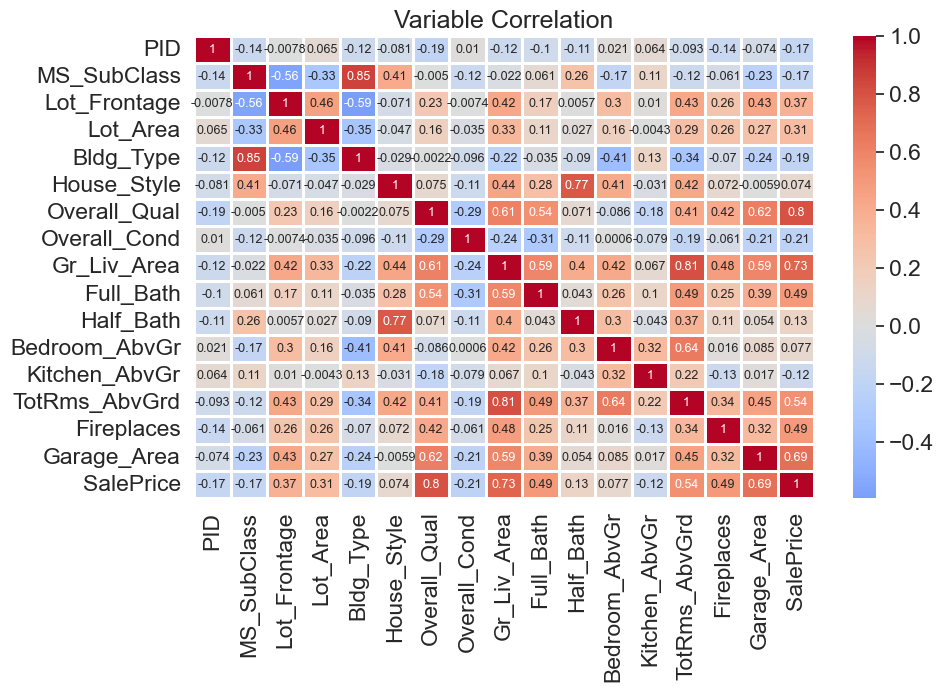

In [25]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

comparing all variables to one another to determine whether there is a relationship between them. In essence, it conveys the same information as a correlation matrix but in a graphical form.

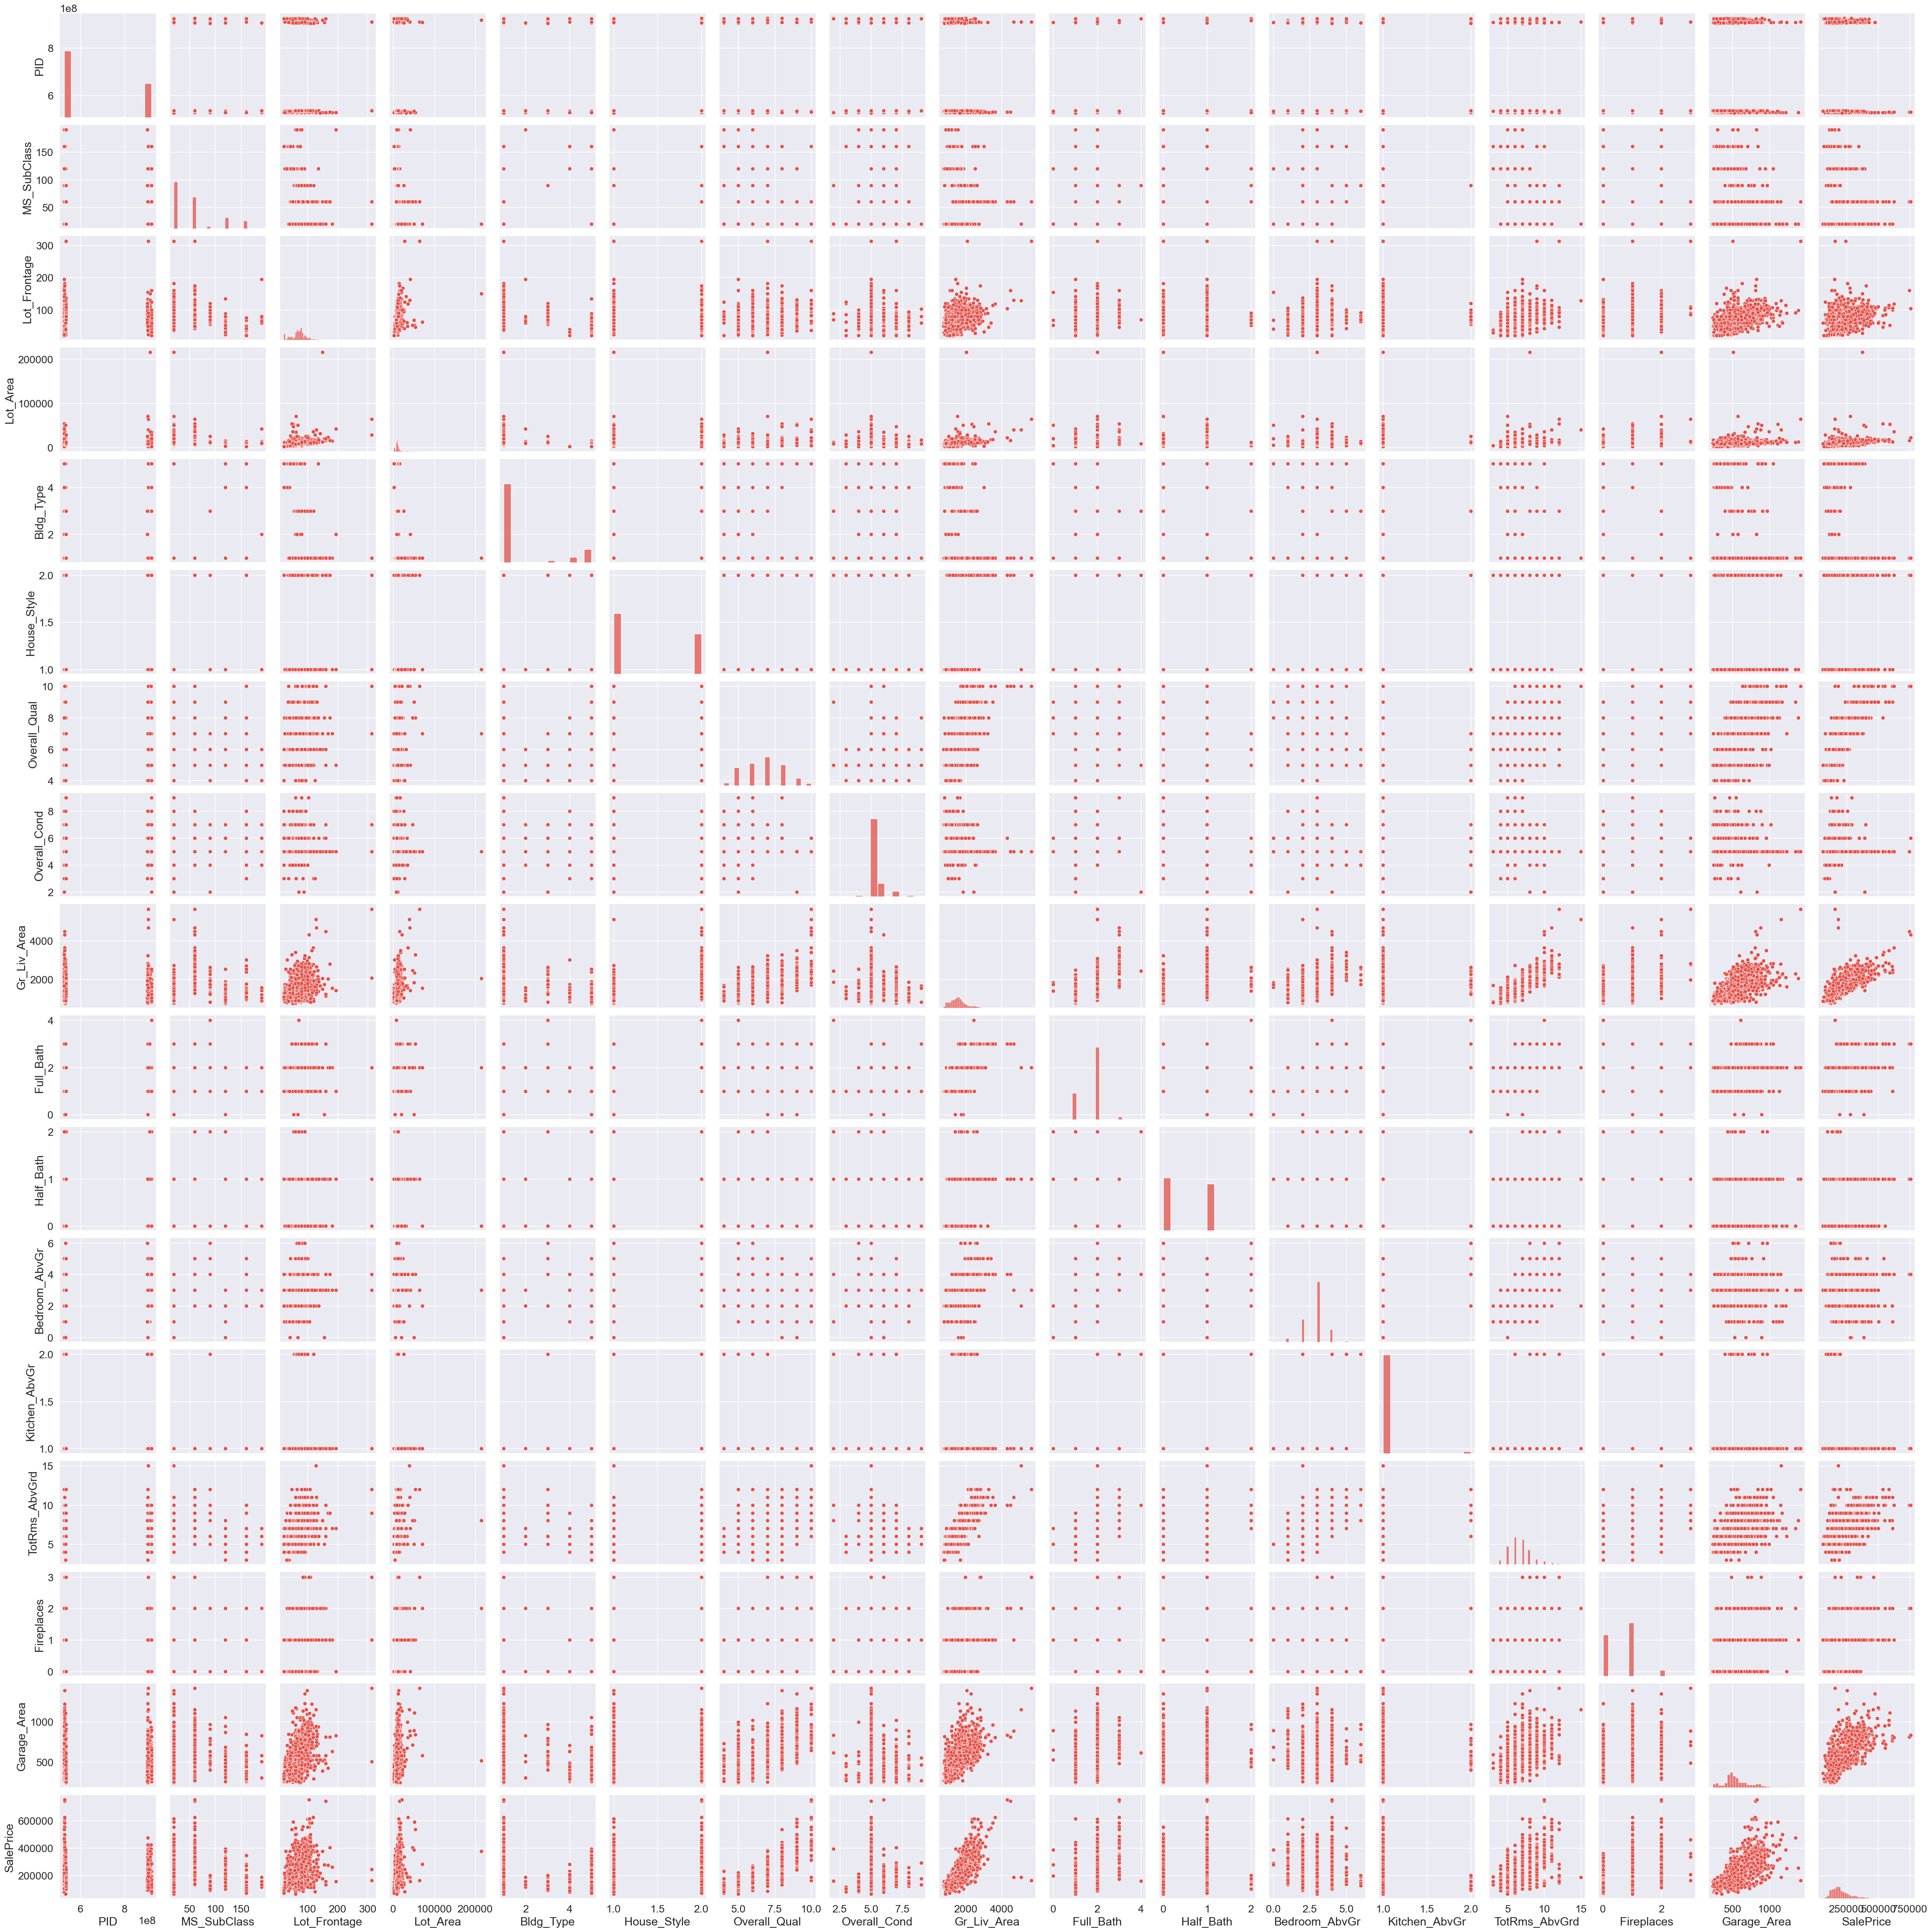

In [26]:
sns.pairplot(dfpd1)

# H20 AutoML Rexecution on new model

Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [27]:
df1=df.drop(['Street','Year_Built', 'Mo_Sold', 'Yr_Sold'], axis=1)

In [28]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [29]:
X1=df1.columns
print(X1)

['PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area', 'SalePrice']


In [30]:
#Seperate Dependent variable from Independent variable
y1_numeric ='SalePrice'
X1.remove(y1_numeric) 
print(X1)

['PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Area']


In [31]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [32]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |
22:13:47.132: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20230409_221347_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    55                 55                          457546                 15           15           15            492           774           656.745

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1601862.6360580246
RMSE: 1265.647121459226
MAE: 591.0691063724347
RMSLE: 0.0061567672180307354
Mean Residual Deviance: 1601862.6360580246

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 958085501.5002216
RMSE: 30952.956264308934
MAE: 20831.523627277824
RMSLE: 0.1295506406018073
Mean Residual Deviance: 958085501.5002216

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     20832.6      1436.03      20516         22407.6       20564.7       21935.2       18739.6
mean_residual_deviance  9.58222e+08  1.45324e+08  9.18485e+08   1.2096e+09    9.11418e+08   9.20148e+08   8.31463e+08
mse                     9.58222e+08  1.45324e+08  9.18485e+08   1.2096e+09    9.11418e+08   9.20148e+08   8.31463e+08
r2                      0.879358     0.0165604    0.896622      0.864348      0.88752       0.859104      0.889197
residual_deviance       9.58222e+08  1.45324e+08  9.18485e+08   1.2096e+09    9.11418e+08   9.20148e+08   8.31463e+08
rmse                    30888.9      2263.24      30306.5       34779.3       30189.7       30333.9       28835.1
rmsle                   0.12941      0.00627175   0.128063      0.133502      0.118997      0.133935      0.132553

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-04-09 22:14:01  5.368 sec   0                  89488.7          66173.5         8.00823e+09
    2023-04-09 22:14:01  5.417 sec   5                  53961.5          39788.9         2.91184e+09
    2023-04-09 22:14:01  5.472 sec   10                 32794.6          24130.5         1.07549e+09
    2023-04-09 22:14:01  5.518 sec   15                 20098.7          14742.4         4.03959e+08
    2023-04-09 22:14:01  5.565 sec   20                 12509.9          9175.94         1.56498e+08
    2023-04-09 22:14:01  5.611 sec   25                 7862.9           5793.57         6.18252e+07
    2023-04-09 22:14:01  5.658 sec   30                 5122.32          3718.26         2.62382e+07
    2023-04-09 22:14:01  5.704 sec   35                 3398.23          2415.01         1.15479e+07
    2023-04-09 22:14:01  5.746 sec   40                 2390.63          1632.08         5.71511e+06
    2023-04-09 22:14:01  5.791 sec   45                 1812.68          1142.67         3.28581e+06
    2023-04-09 22:14:01  5.860 sec   50                 1496.96          811.095         2.2409e+06
    2023-04-09 22:14:01  5.934 sec   55                 1265.65          591.069         1.60186e+06

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Garage_Area    1.02166e+13            1                    0.24873
Overall_Qual   9.89238e+12            0.968268             0.240838
Gr_Liv_Area    6.08226e+12            0.595333             0.148077
TotRms_AbvGrd  3.3702e+12             0.329876             0.0820502


In [33]:
print(aml1.leaderboard)

model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_2_20230409_221347_model_8              30953    9.58086e+08  20831.5  0.129551               9.58086e+08
StackedEnsemble_BestOfFamily_4_AutoML_2_20230409_221347  31150.1  9.70329e+08  20658.6  0.128756               9.70329e+08
GBM_5_AutoML_2_20230409_221347                           31348.3  9.82719e+08  20270.1  0.125756               9.82719e+08
GBM_grid_1_AutoML_2_20230409_221347_model_40             31444.9  9.88782e+08  20498.1  0.127397               9.88782e+08
GBM_grid_1_AutoML_2_20230409_221347_model_15             31491.5  9.91713e+08  19987    0.12725                9.91713e+08
StackedEnsemble_BestOfFamily_3_AutoML_2_20230409_221347  31495.9  9.91994e+08  20114.8  0.125385               9.91994e+08
StackedEnsemble_AllModels_2_AutoML_2_20230409_221347     31607.9  9.99057e+08  20188.4  0.126071               9.99057e+08
GBM_grid_1_AutoM

In [34]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_2_20230409_221347_model_8': 0,
 'GLM_1_AutoML_2_20230409_221347': 125}

In [35]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

0


In [36]:
best_model1.algo

'gbm'

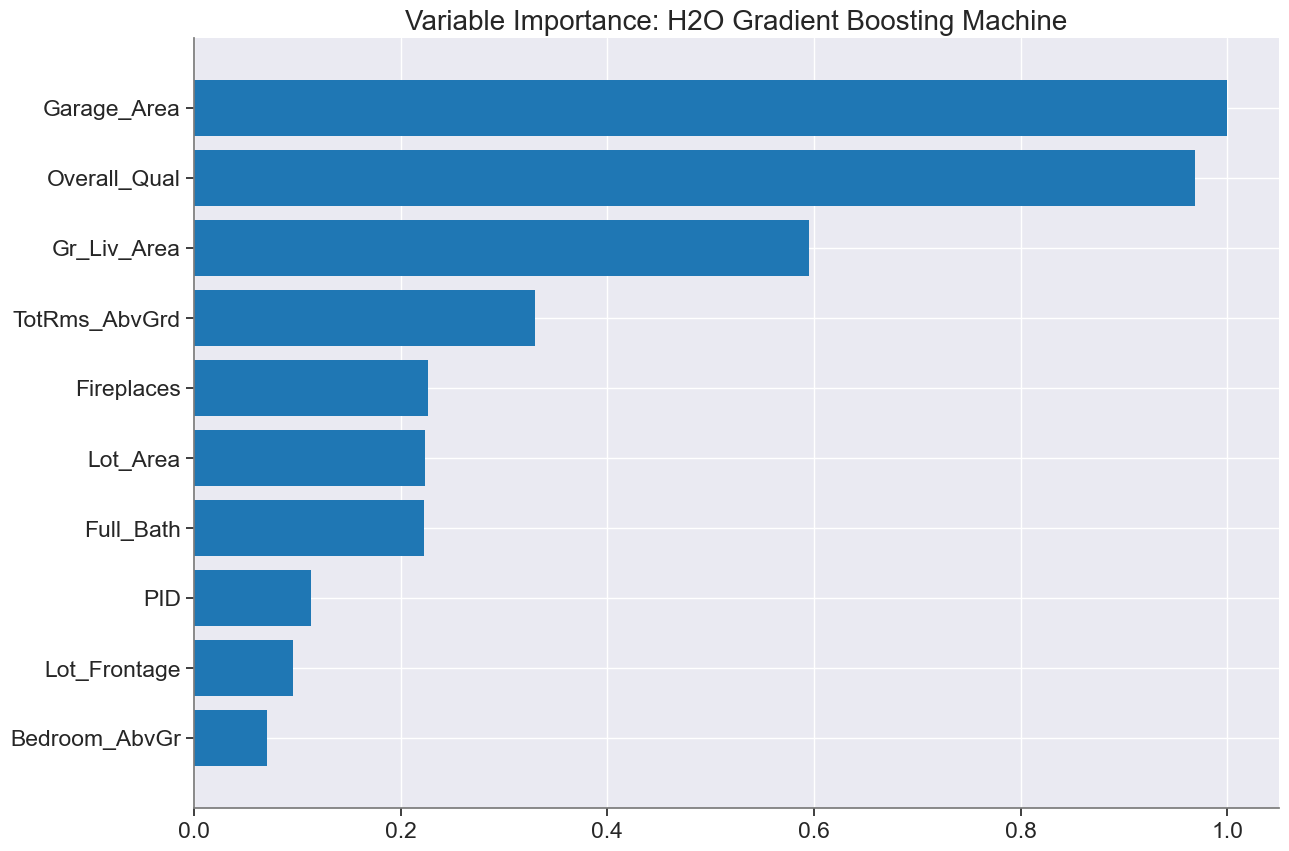

<Figure size 640x480 with 0 Axes>

In [37]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

125
glm


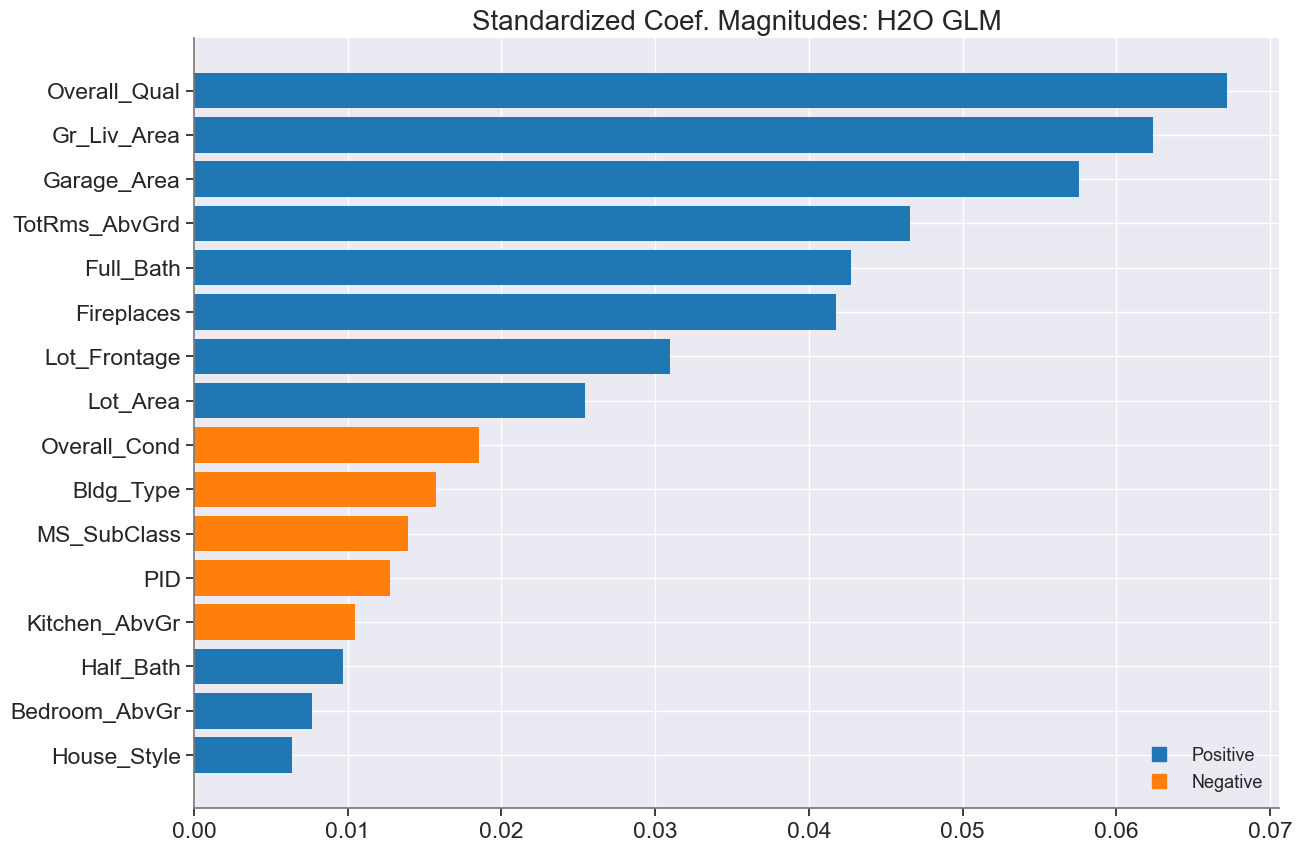

In [38]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo) 
  glm_model1.std_coef_plot()

From the above results, we observe that Overall_Qual, Gr_Liv_Area, Garage_Area, TotRms_AbvGrd, Full_Bath, Fireplaces, Lot_Frontage,Lot_Area are some of the important features.

# Checking if assumptions violated

In [39]:
#Seperating the predictor and target variables
A=dfpd1.drop(['SalePrice'],axis=1)
B=dfpd1['SalePrice']

In [40]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [41]:
cols1 = ['MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Bldg_Type','House_Style','Overall_Qual','Overall_Cond','Gr_Liv_Area','Full_Bath','Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Area']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [42]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [43]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 5.501594084004561e-09


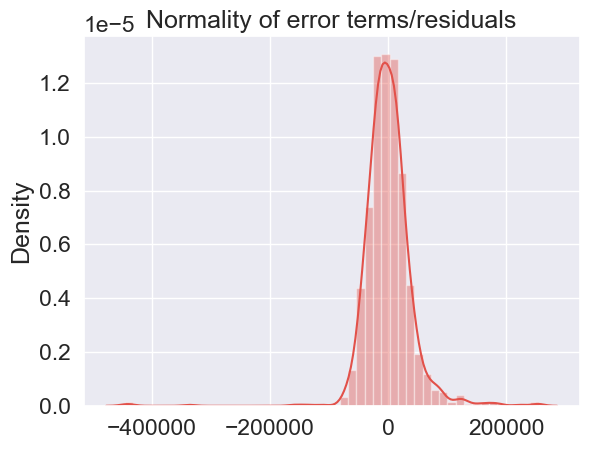

In [44]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

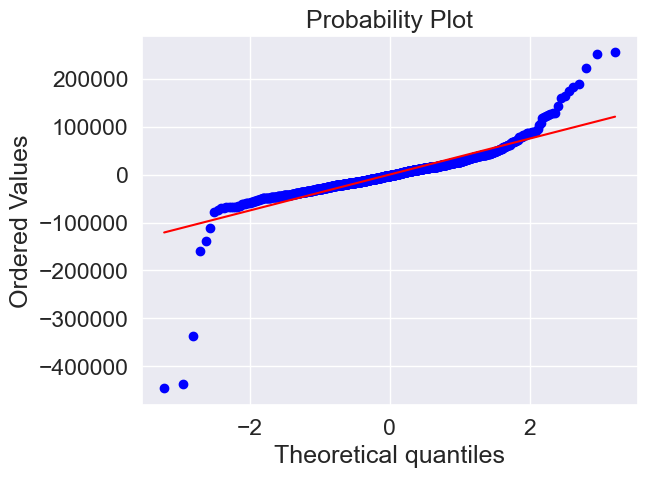

In [45]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

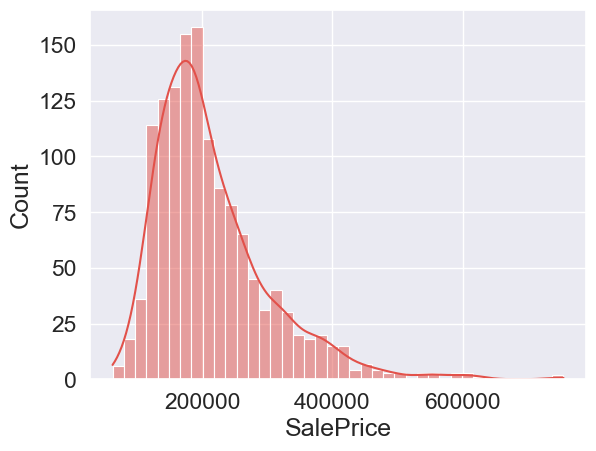

In [46]:
sns.histplot(dfpd.SalePrice, kde = True)

# Ridge Regularization in H20
Regression's primary goal is to identify patterns in the underlying dataset and generalize them in order to forecast the target value for a few additional independent values. Nonetheless, the target dataset may occasionally contain some random noise. Even though the training set may not include any errors, the test dataset's predictions of the proper target values will have significant errors. Regularization is done to avoid this circumstance. Regularization is a method for fine-tuning the random noise function by including an extra term. This additional term regulates the function's excessive fluctuation so that neither the coefficients nor the target value prediction for test data are drastically impacted. Ridge Regularization is utilized for this model.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [47]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [48]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1681091911014_48


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  16                            16                             1                       py_9_sid_9dc7

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1706235059.7175868
RMSE: 41306.598258844635
MAE: 25892.784594272303
RMSLE: 0.1700324272484688
Mean Residual Deviance: 1706235059.7175868
R^2: 0.7869397428168267
Null degrees of freedom: 1071
Residual degrees of freedom: 1055
Null deviance: 8584820126471.279
Residual deviance: 1829083984017.253
AIC: 25866.303240207333

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2023-04-09 22:23:21  0.000 sec   0             8584820126471.279          8008227729.917238
    2023-04-09 22:23:21  0.022 sec   1                                                           41306.598258844635  1706235059.7175868   25892.784594272303  0.7869397428168267

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Overall_Qual   38272.1                1                    0.260513
Gr_Liv_Area    37839.7                0.988702             0.25757
House_Style    13930.8                0.363993             0.0948252
Garage_Area    12291.7                0.321165             0.0836679
Lot_Frontage   6796.29                0.177578             0.0462615
Kitchen_AbvGr  5385.02                0.140704             0.0366552
MS_SubClass    5377.43                0.140505             0.0366035
Lot_Area       4519.15                0.11808              0.0307614
Fireplaces     4174.29                0.109069             0.0284139
Half_Bath      3712.2                 0.096995             0.0252685
Overall_Cond   3549.91                0.0927545            0.0241638
Bldg_Type      2629.14                0.068696             0.0178962
TotRms_AbvGrd  2516.22                0.0657455            0.0171276
Bedroom_AbvGr  2386.49                0.0623558            0.0162445
PID            2268                   0.05926              0.015438
Full_Bath      1261.81                0.0329695            0.00858901

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [49]:
#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1681091911014_49


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              16                            16                             1                       py_9_sid_9dc7

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1706225423.3846989
RMSE: 41306.48161468971
MAE: 25898.62196205389
RMSLE: 0.17013570099825065
Mean Residual Deviance: 1706225423.3846989
R^2: 0.7869409461208801
Null degrees of freedom: 1071
Residual degrees of freedom: 1055
Null deviance: 8584820126471.279
Residual deviance: 1829073653868.3972
AIC: 25866.29718583753

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  -----------------  ------------------
    2023-04-09 22:23:47  0.000 sec   0             8584820126471.279          8008227729.917238
    2023-04-09 22:23:47  0.020 sec   1                                                           41306.48161468971  1706225423.3846989   25898.62196205389  0.7869409461208801

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Overall_Qual   38334.4                1                    0.26062
Gr_Liv_Area    38015.1                0.991672             0.258449
House_Style    14027.9                0.365935             0.0953701
Garage_Area    12249.2                0.319537             0.0832776
Lot_Frontage   6848.47                0.178651             0.04656
Kitchen_AbvGr  5379.45                0.14033              0.0365727
MS_SubClass    5317.32                0.138709             0.0361503
Lot_Area       4512.43                0.117713             0.0306782
Fireplaces     4142.17                0.108054             0.028161
Half_Bath      3726.86                0.0972198            0.0253374
Overall_Cond   3563.21                0.0929508            0.0242248
Bldg_Type      2712.36                0.0707552            0.0184402
TotRms_AbvGrd  2421.97                0.0631802            0.016466
Bedroom_AbvGr  2353.47                0.0613932            0.0160003
PID            2265.71                0.0591038            0.0154036
Full_Bath      1219.1                 0.0318017            0.00828817

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Data Report

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -------  -----------  -------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_2_20230409_221347_model_12             28764.5  8.27398e+08  18379.8  0.120046               8.27398e+08                 294                   0.003852  GBM
GBM_5_AutoML_2_20230409_221347                           29622.9  8.77516e+08  18985.4  0.124254               8.77516e+08                 182                   0.00552   GBM
GBM_grid_1_AutoML_2_20230409_221347_model_88             29778    8.8673e+08   19922.3  0.12617                8.8673e+08                  157                   0.007355  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_68             30065.5  9.03935e+08  19356.7  0.125235               9.03935e+08                 351                   0.005131  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_55             30145.3  9.08738e+08  20052    0.127698               9.08738e+08                 239                   0.00769   GBM
StackedEnsemble_AllModels_2_AutoML_2_20230409_221347     30255.8  9.15415e+08  18915.8  0.124541               9.15415e+08                 135                   0.024788  StackedEnsemble
GBM_2_AutoML_2_20230409_221347                           30418.9  9.25309e+08  19094.3  0.126202               9.25309e+08                 225                   0.004752  GBM
StackedEnsemble_BestOfFamily_3_AutoML_2_20230409_221347  30448.4  9.27104e+08  18949.1  0.124739               9.27104e+08                 123                   0.032359  StackedEnsemble
GBM_grid_1_AutoML_2_20230409_221347_model_26             30474.4  9.28688e+08  19100.7  0.125873               9.28688e+08                 291                   0.007409  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_17             30476    9.28786e+08  19686.3  0.125842               9.28786e+08                 150                   0.004011  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_39             30678    9.4114e+08   19575.1  0.126919               9.4114e+08                  220                   0.004242  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_54             30771.2  9.46869e+08  19765.8  0.126948               9.46869e+08                 319                   0.005489  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_5              30823.9  9.50112e+08  19730.1  0.127856               9.50112e+08                 315                   0.005126  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_35             30862.1  9.52468e+08  19034.4  0.126853               9.52468e+08                 325                   0.006664  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_31             30882    9.53697e+08  19821.6  0.127677               9.53697e+08                 211                   0.005712  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_29             30903.2  9.55008e+08  19933.4  0.128097               9.55008e+08                 259                   0.006231  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_15             30936.2  9.57049e+08  20251.1  0.129072               9.57049e+08                 213                   0.007802  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_3              30944.6  9.5757e+08   19974.1  0.13018                9.5757e+08                   83                   0.00668   GBM
GBM_grid_1_AutoML_2_20230409_221347_model_28             31001.6  9.61098e+08  19664.5  0.130744               9.61098e+08                 156                   0.006471  GBM
GBM_grid_1_AutoML_2_20230409_221347_model_84             31075.8  9.65708e+08  20503.5  0.131086               9.65708e+08                 296                   0.00721   GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

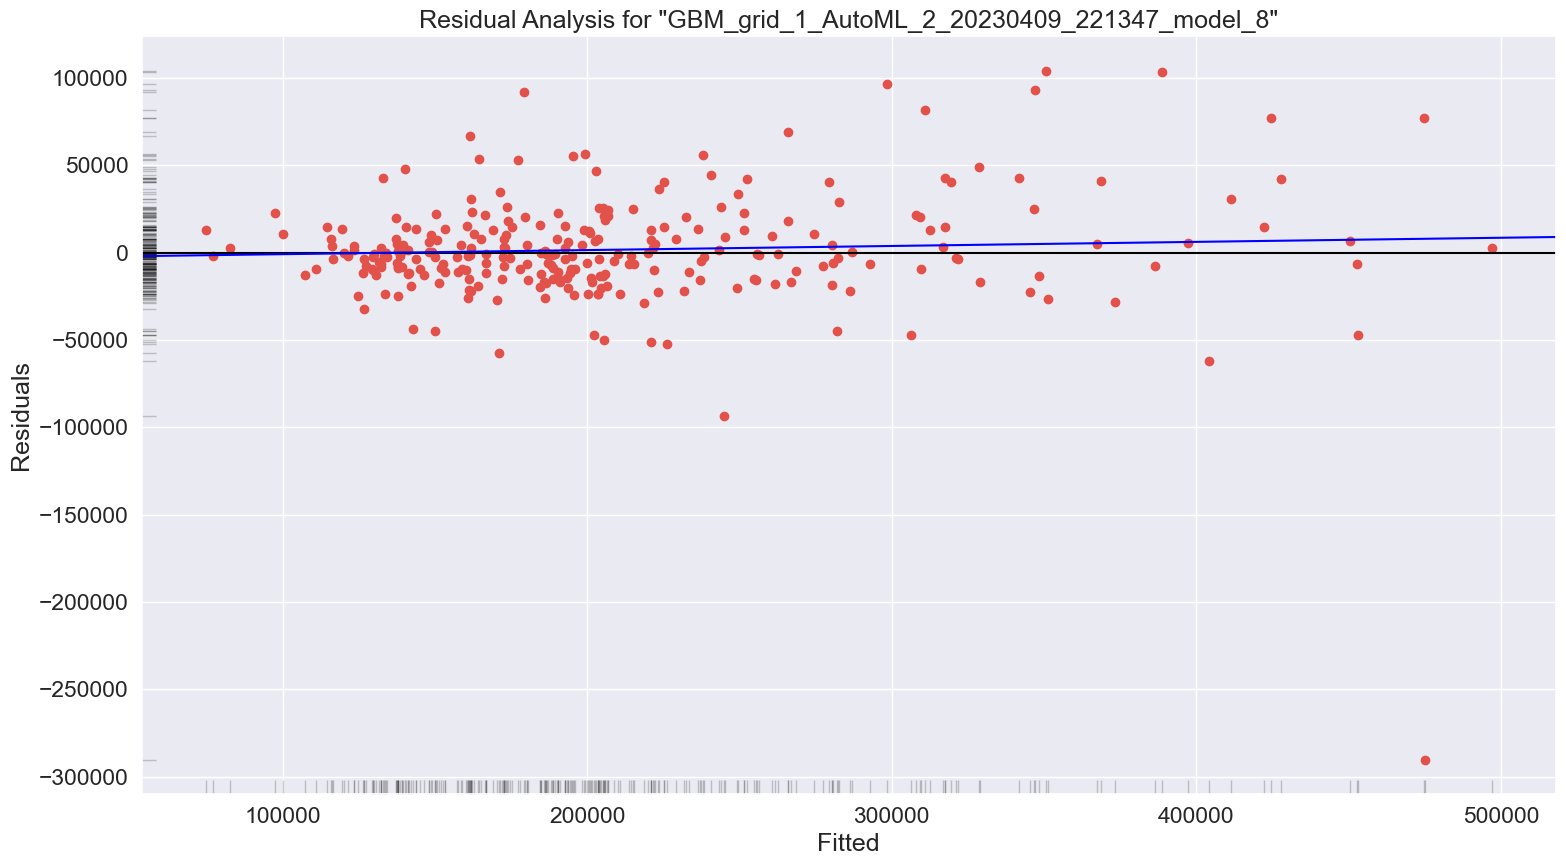

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

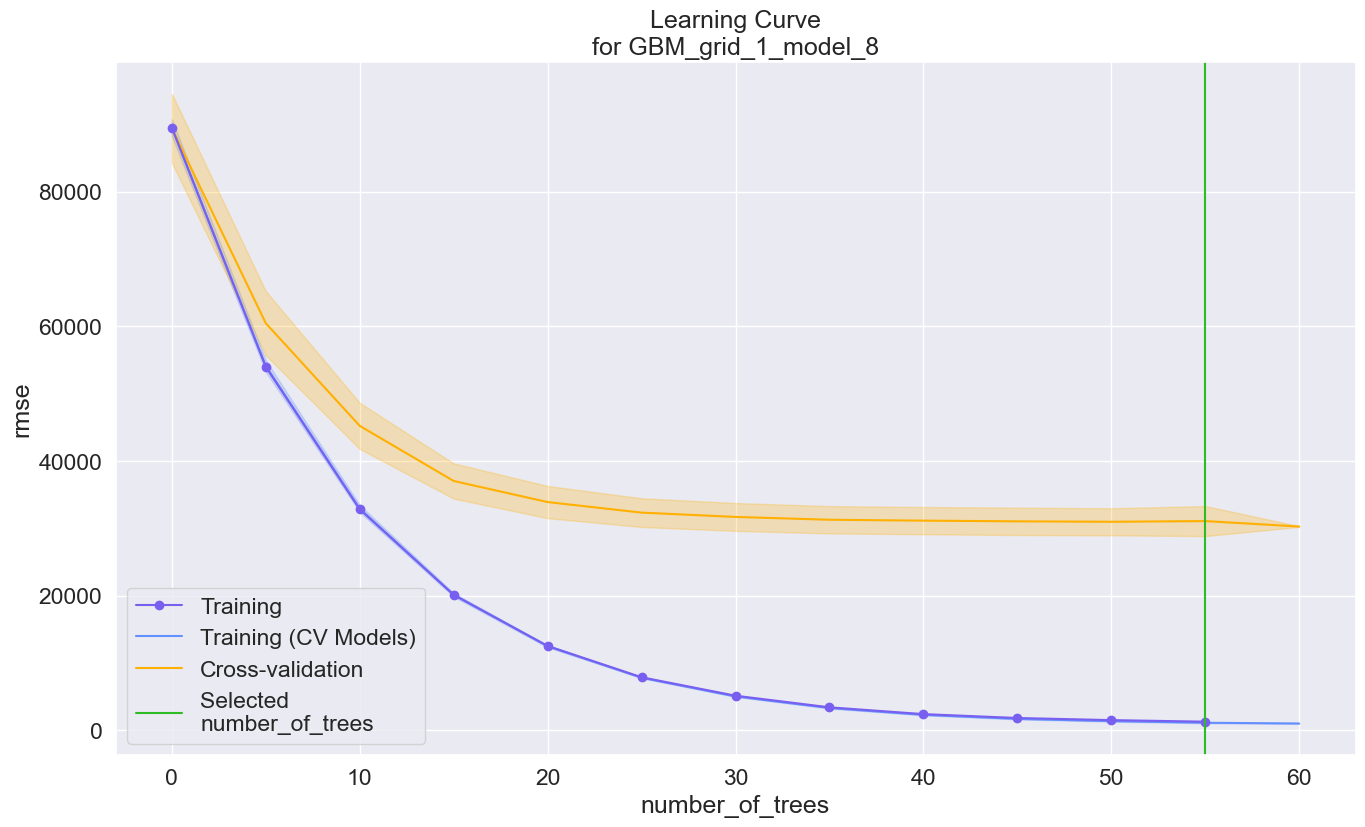

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

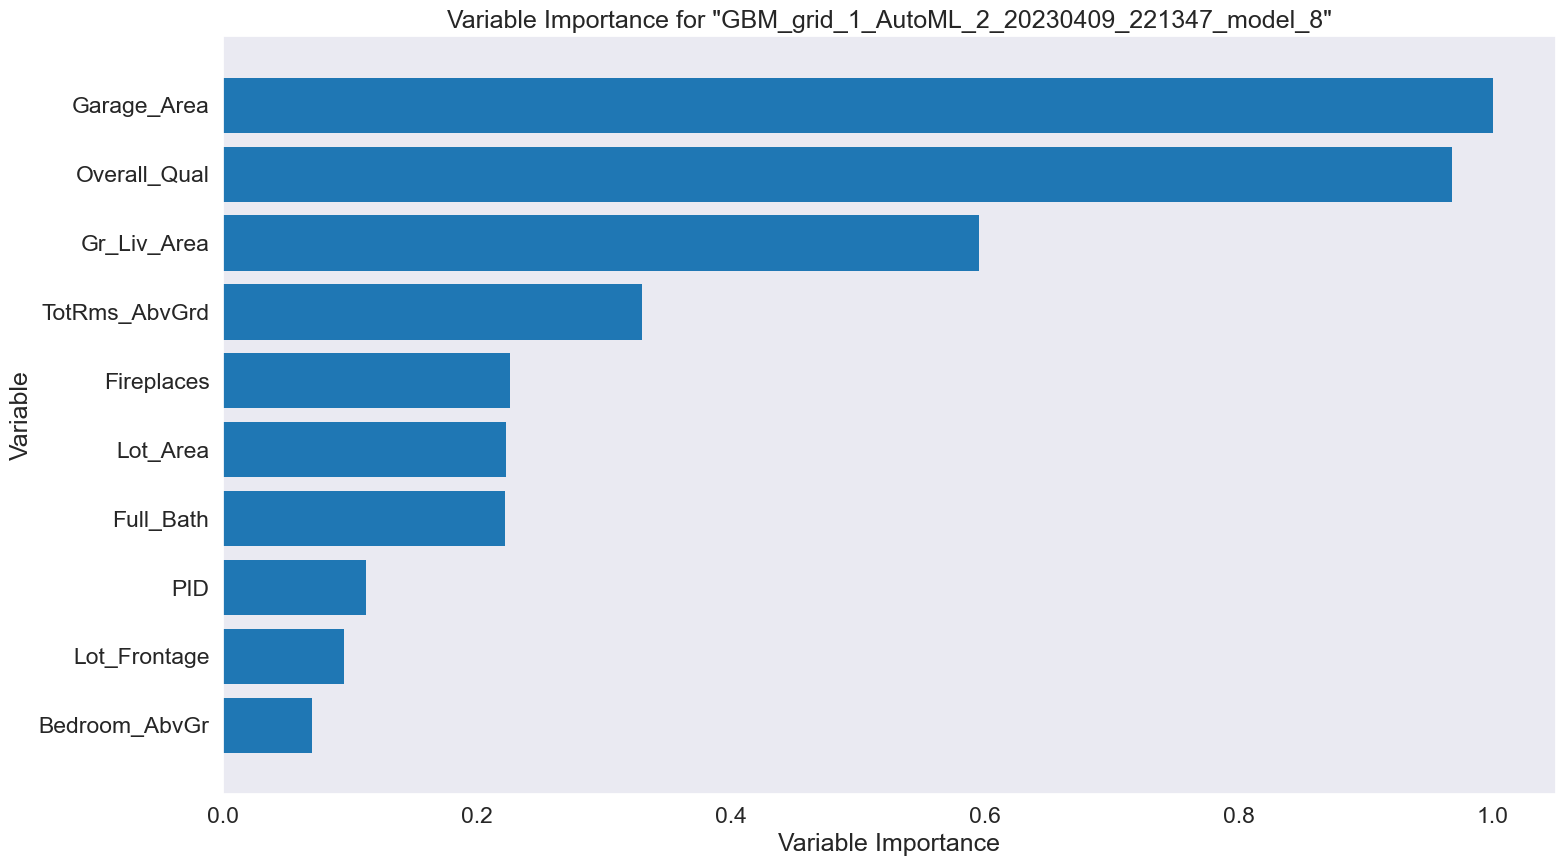

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

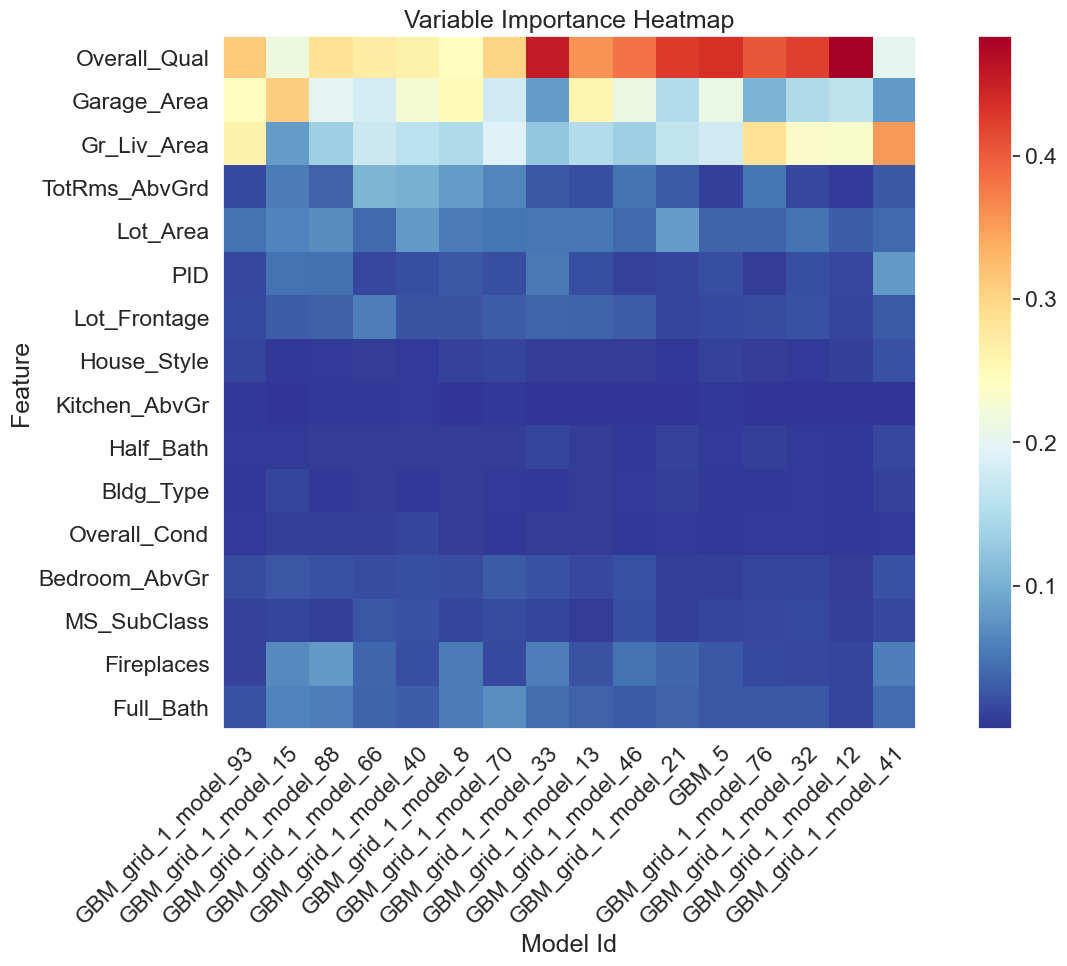

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

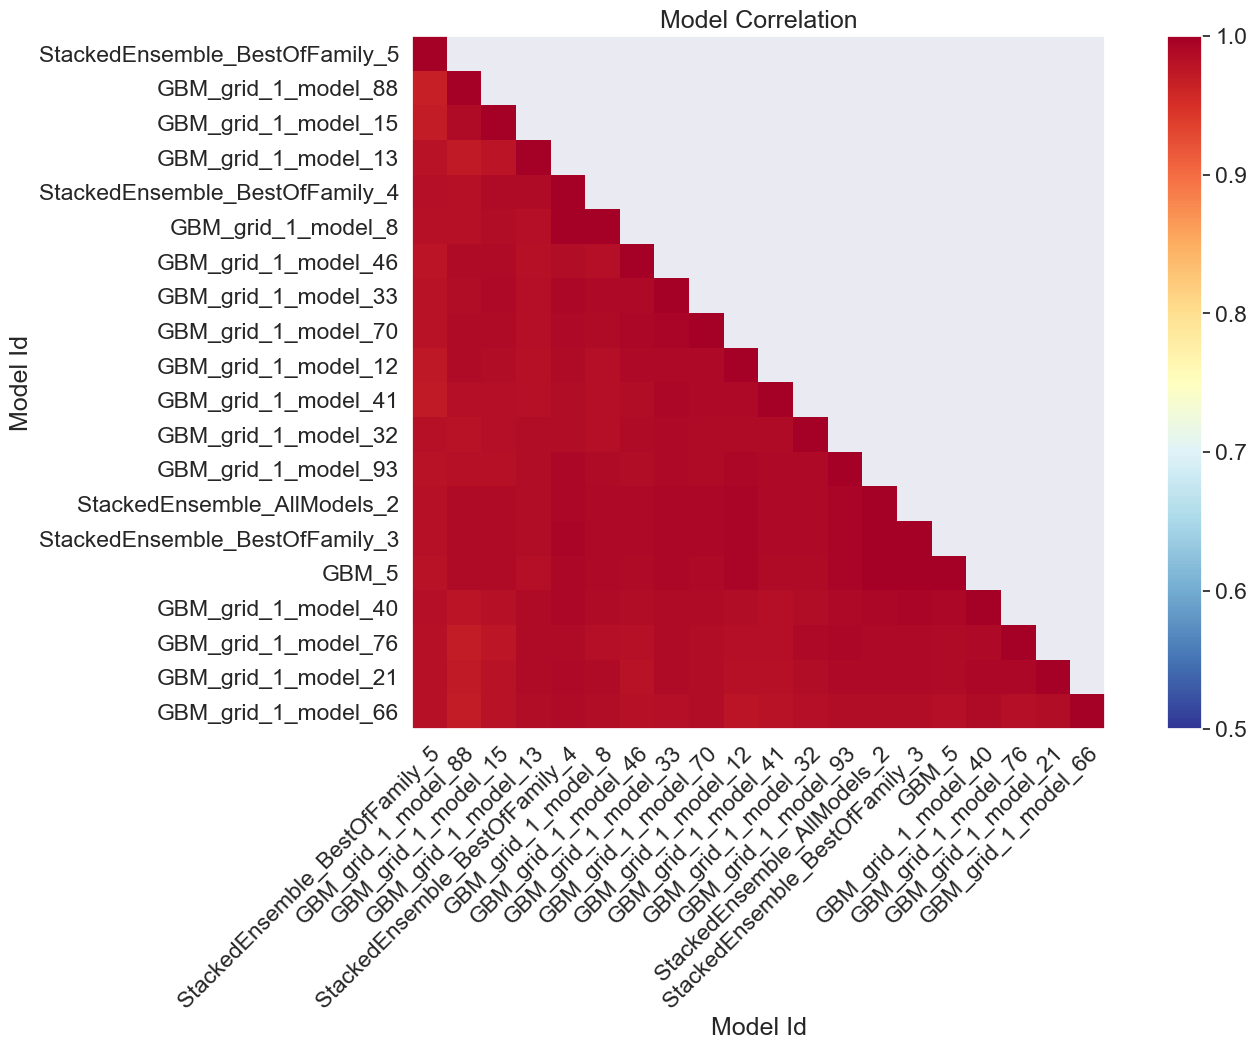

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

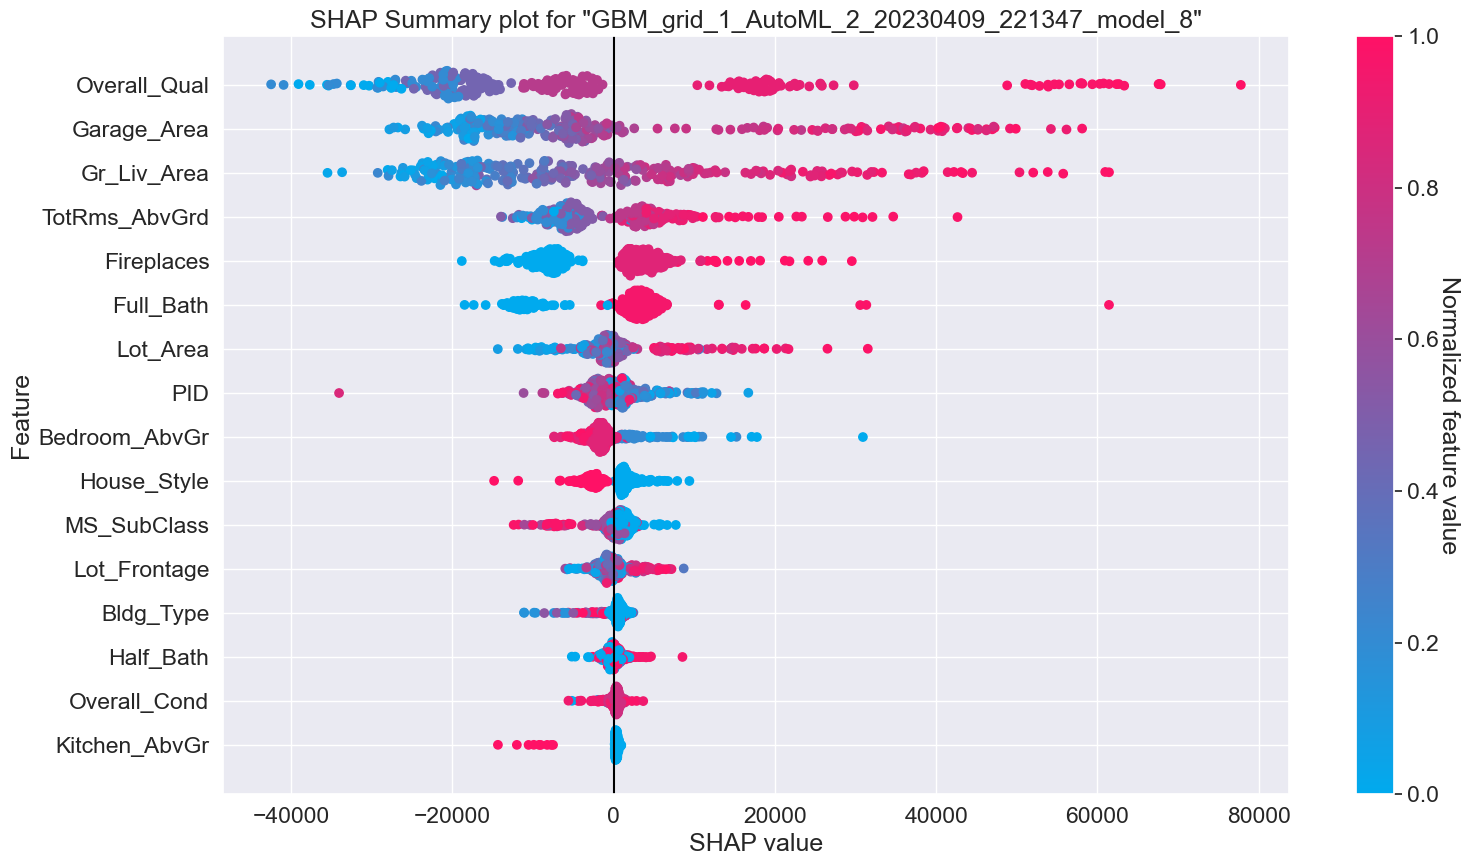

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

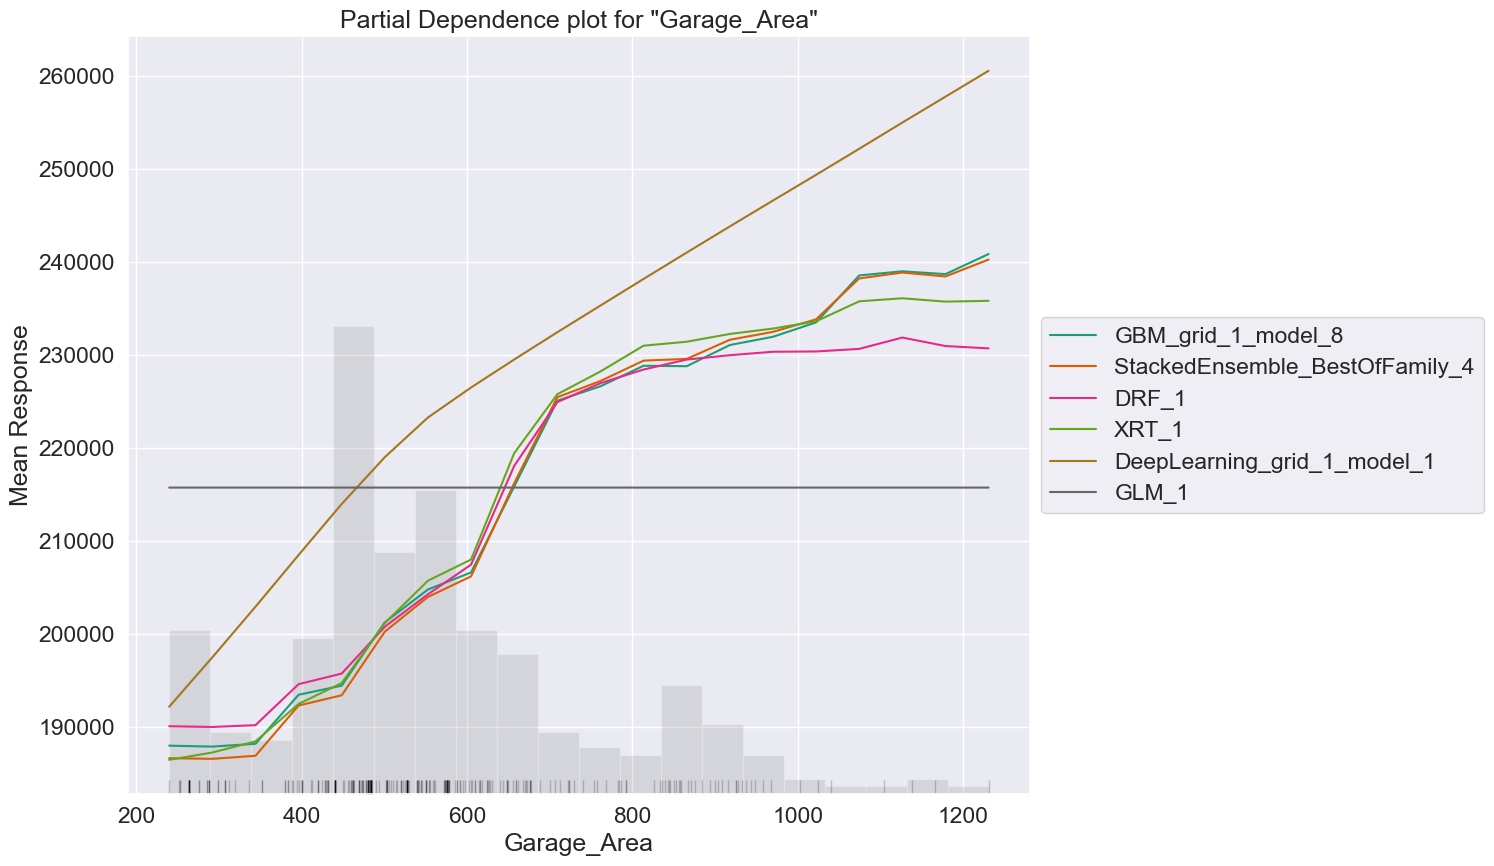

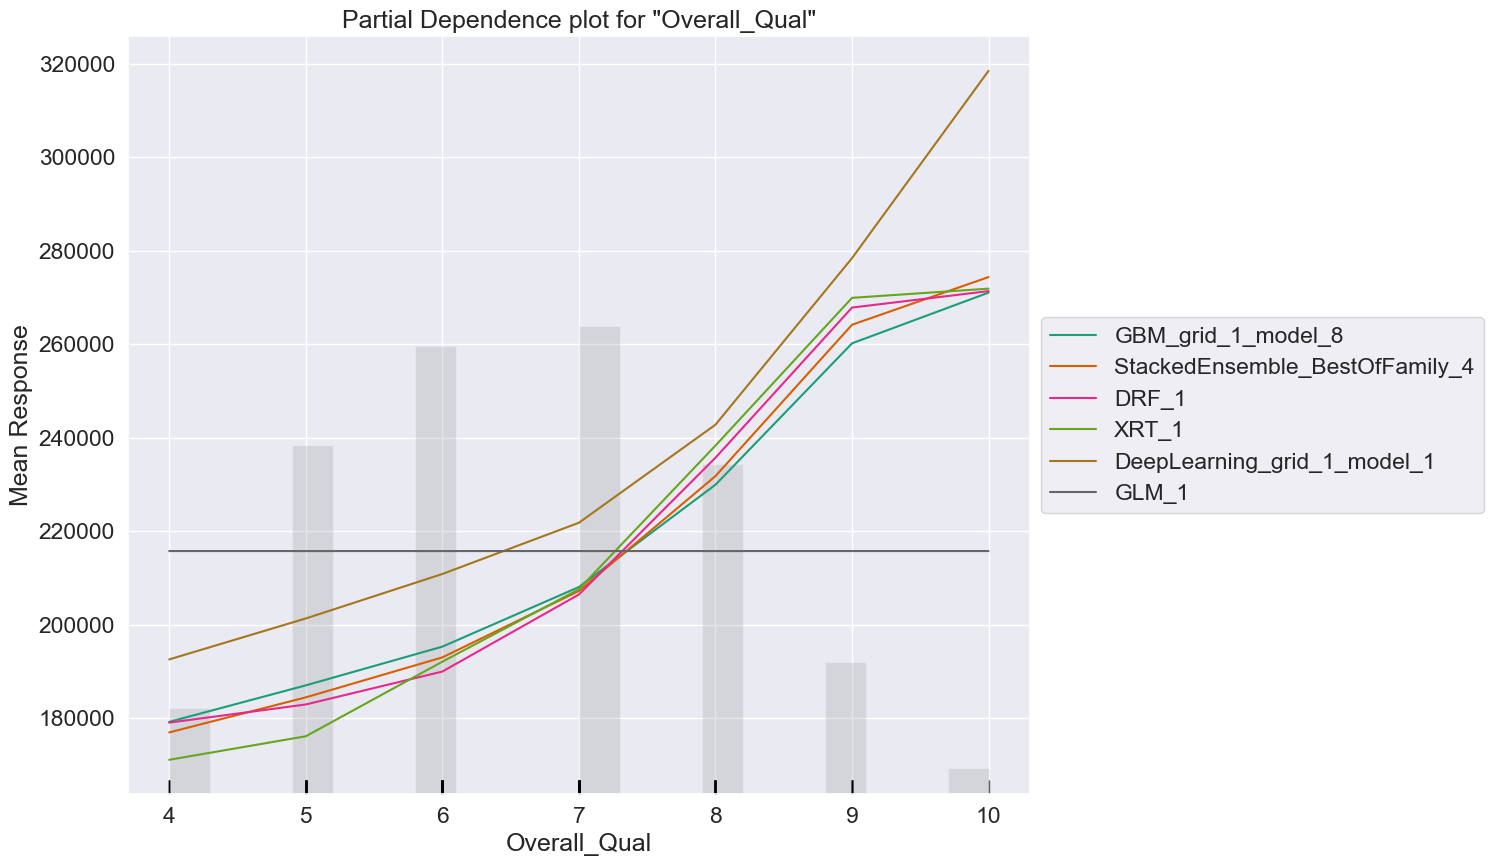

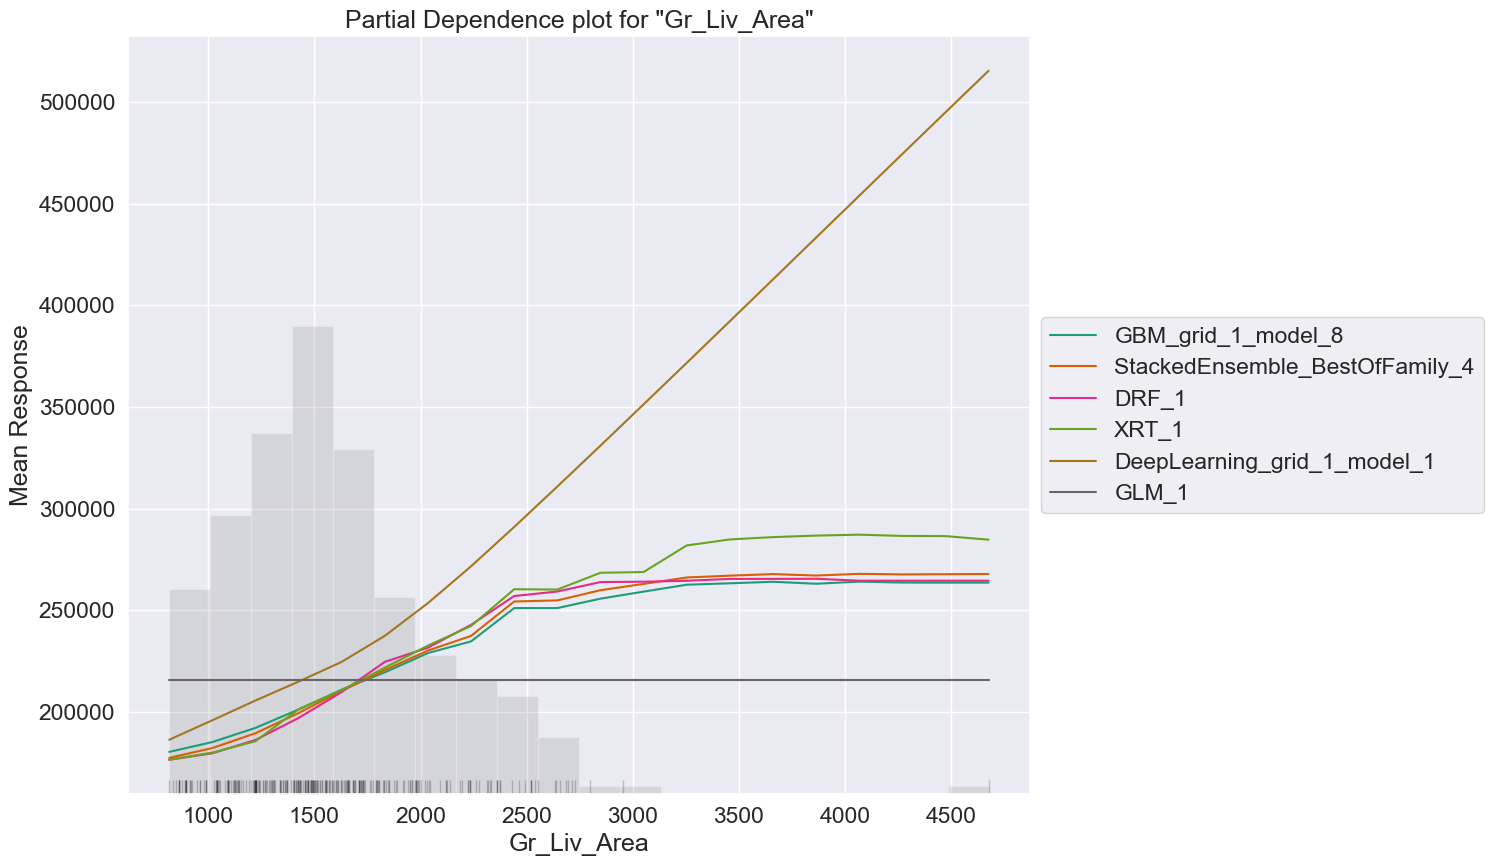

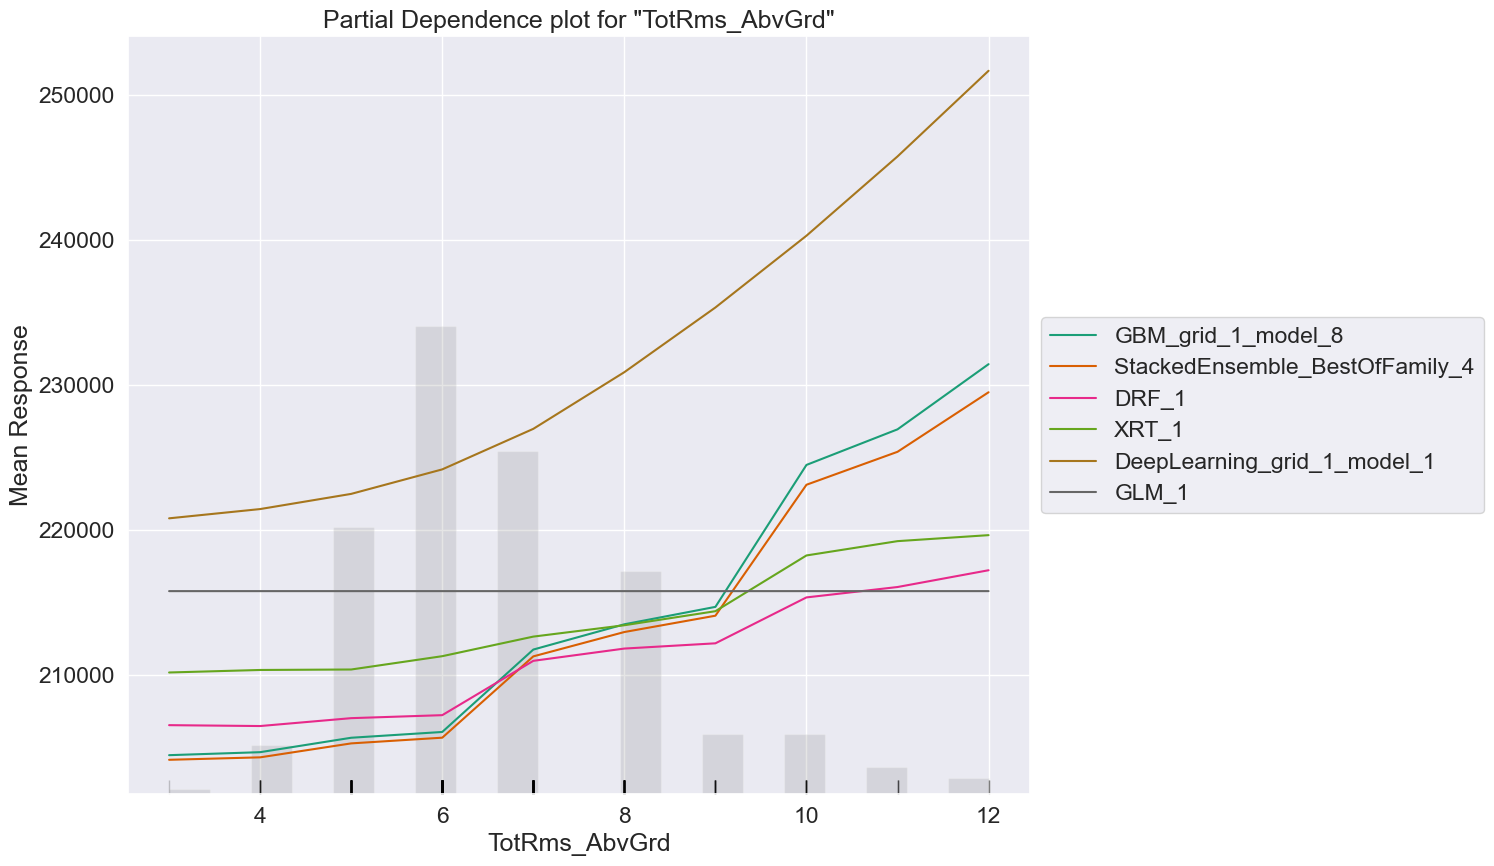

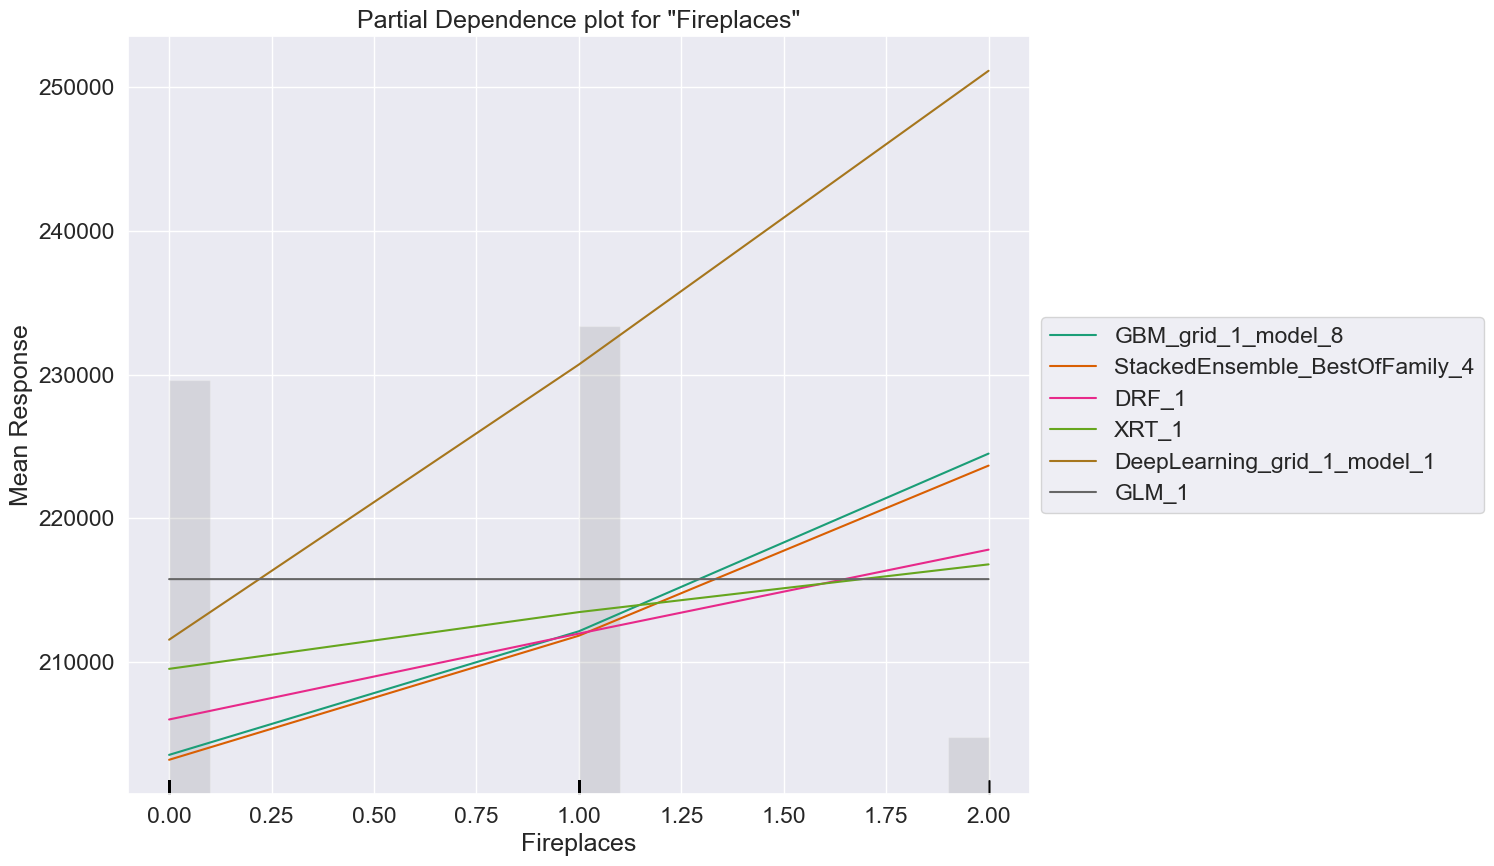

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

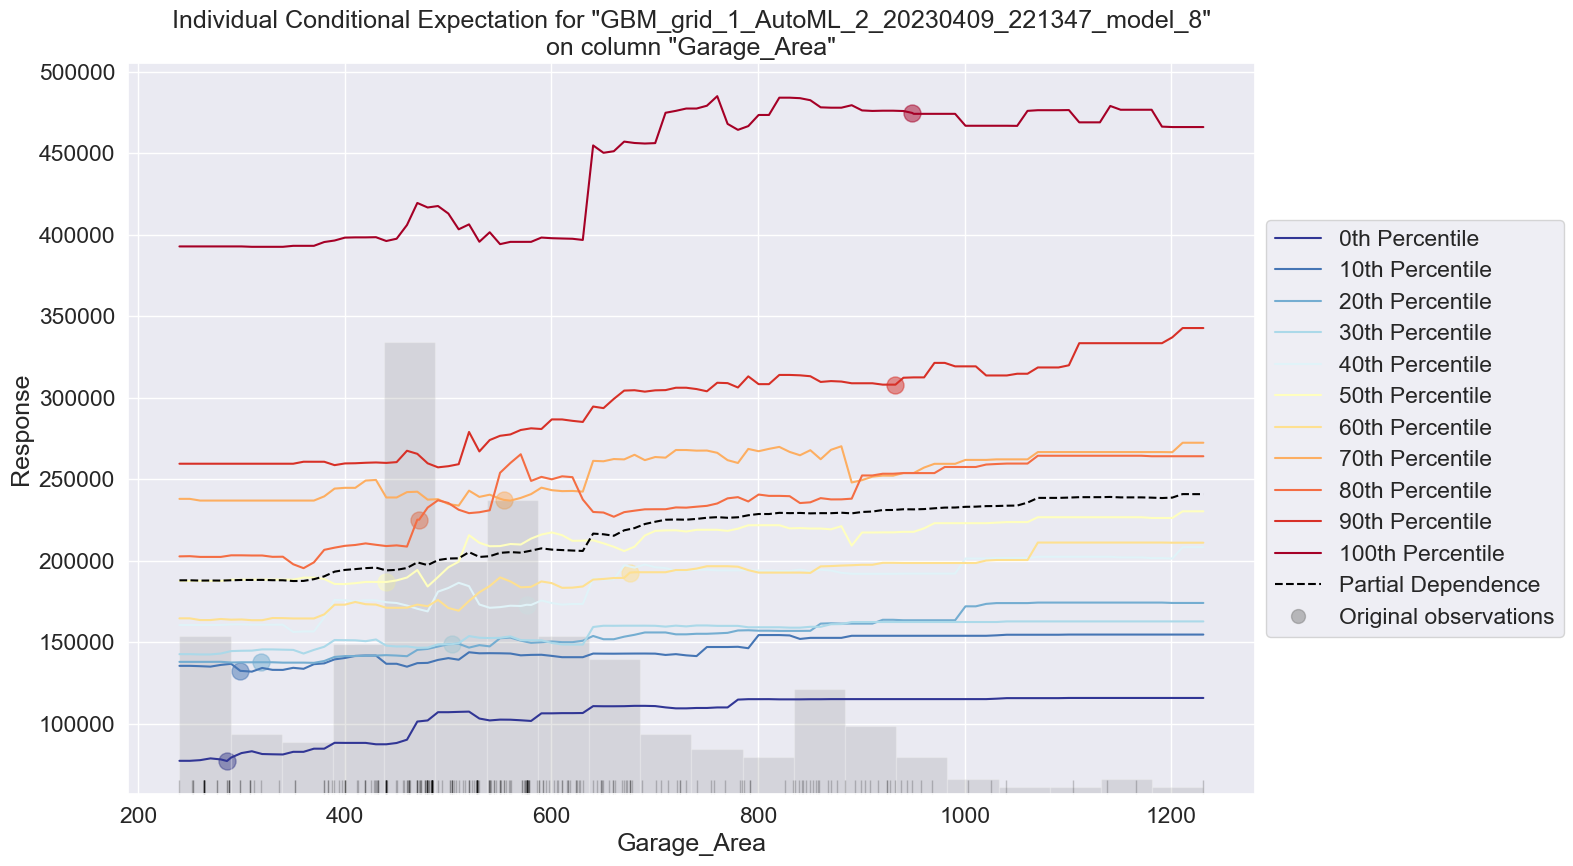

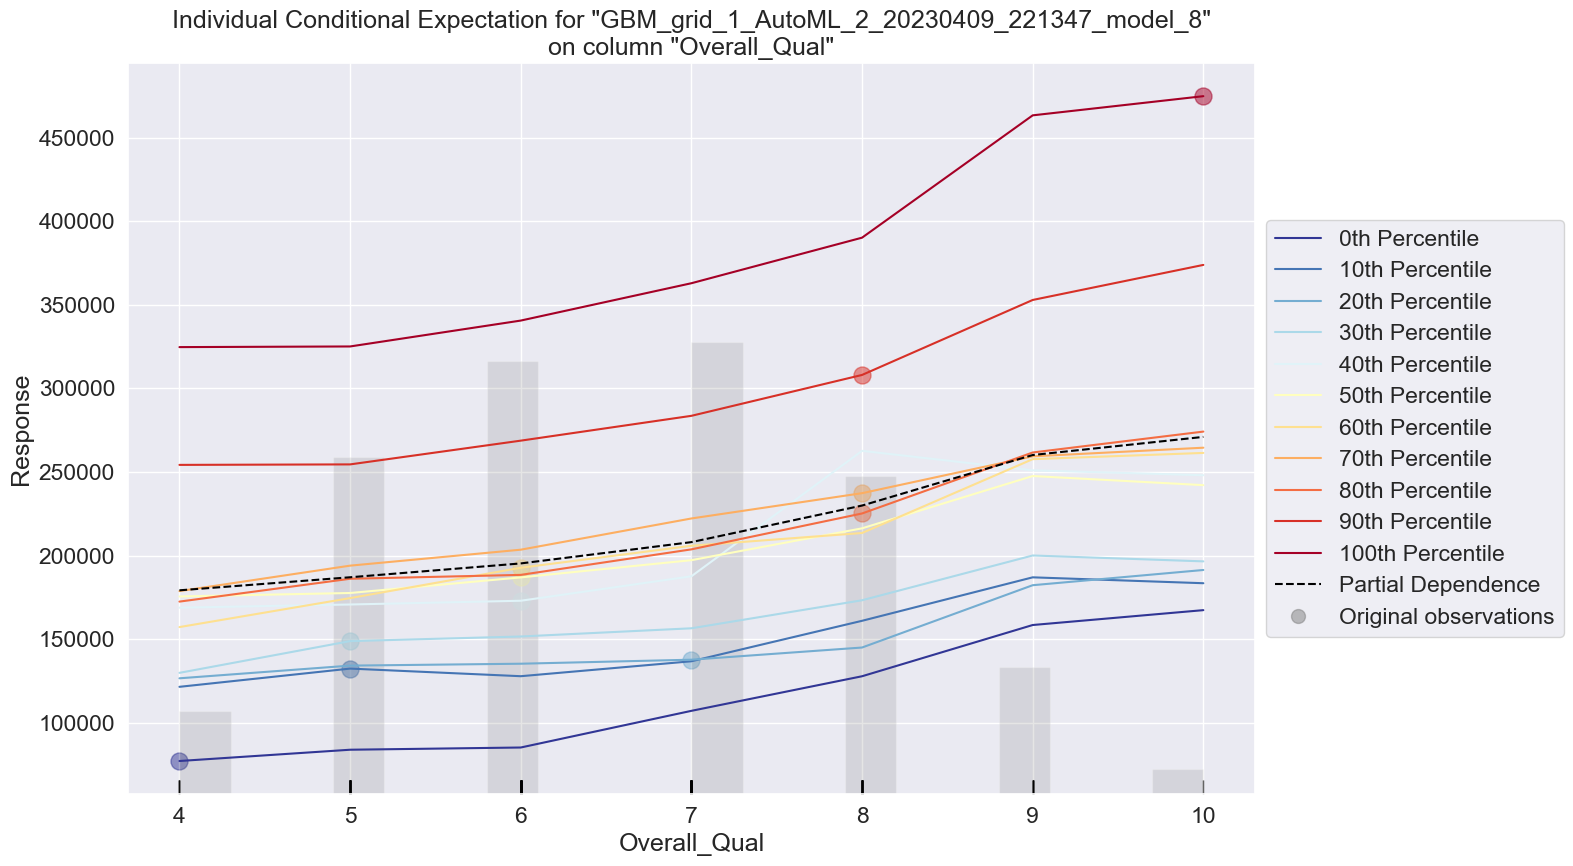

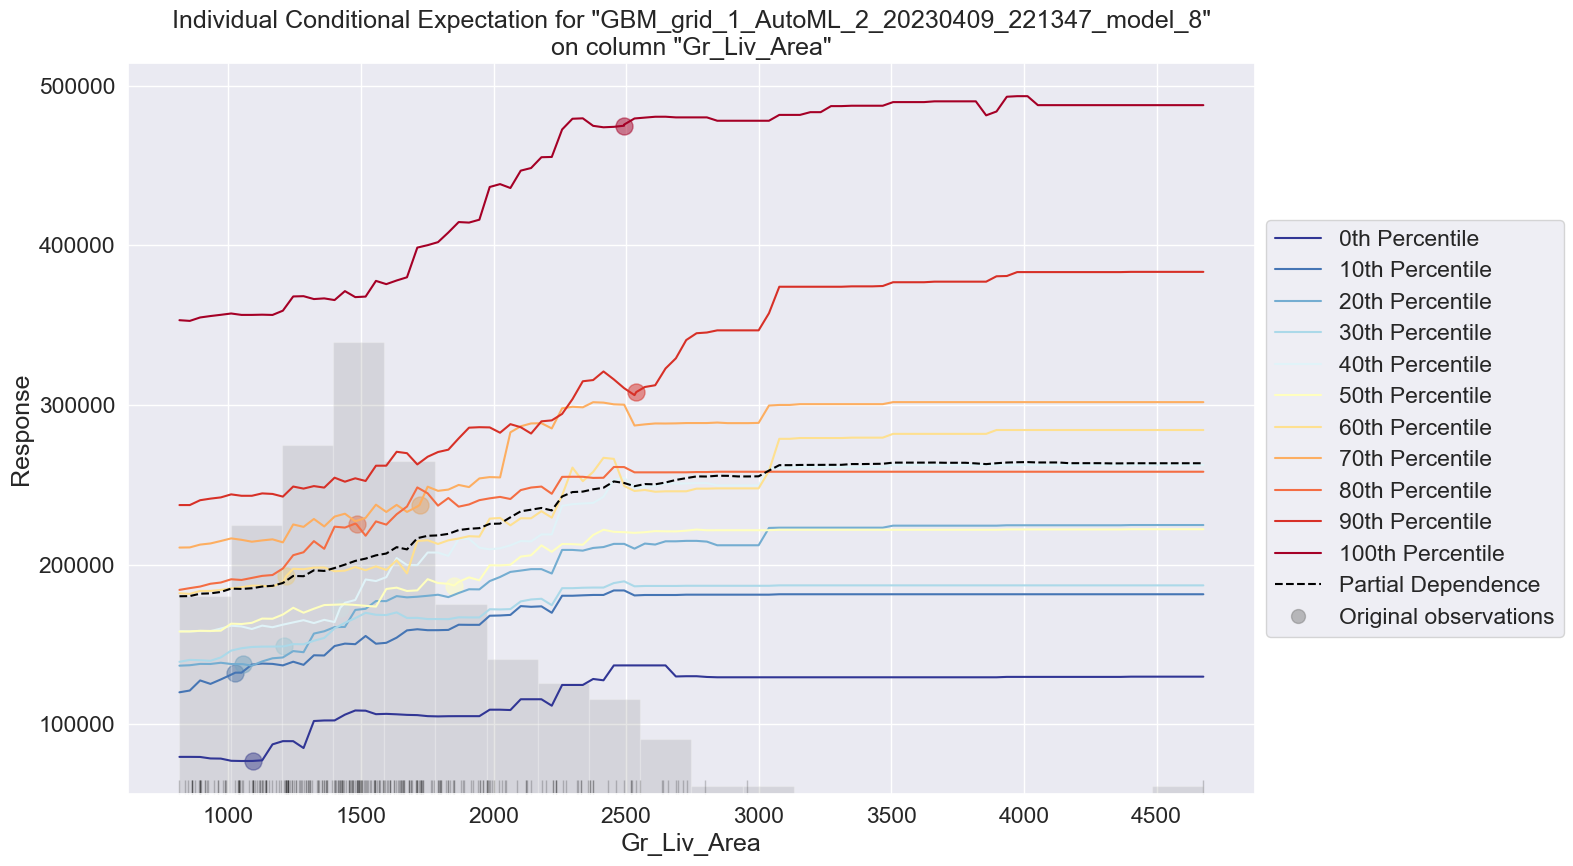

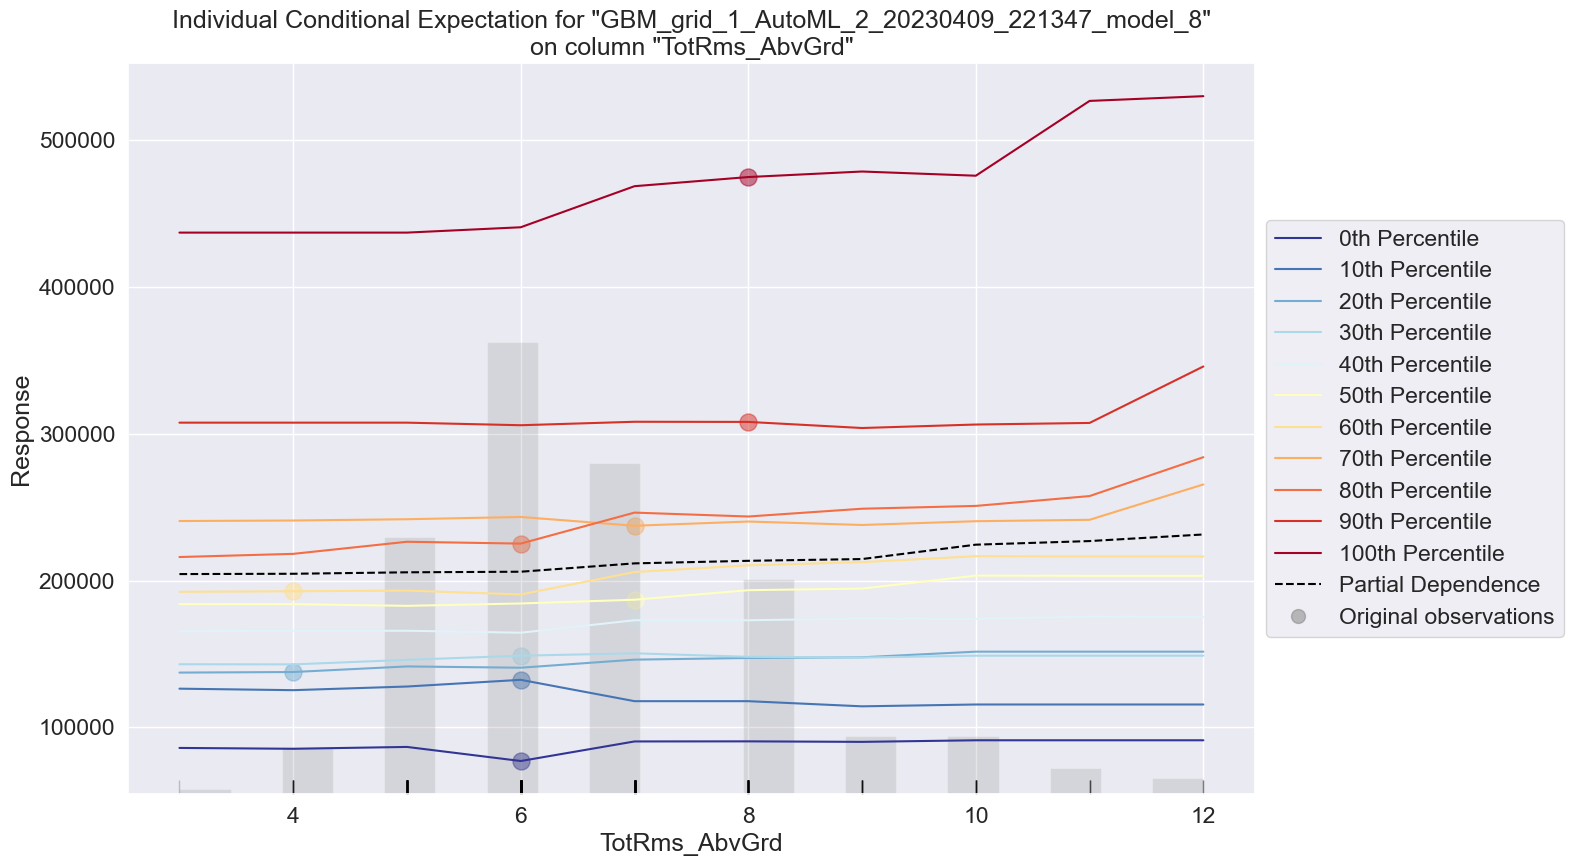

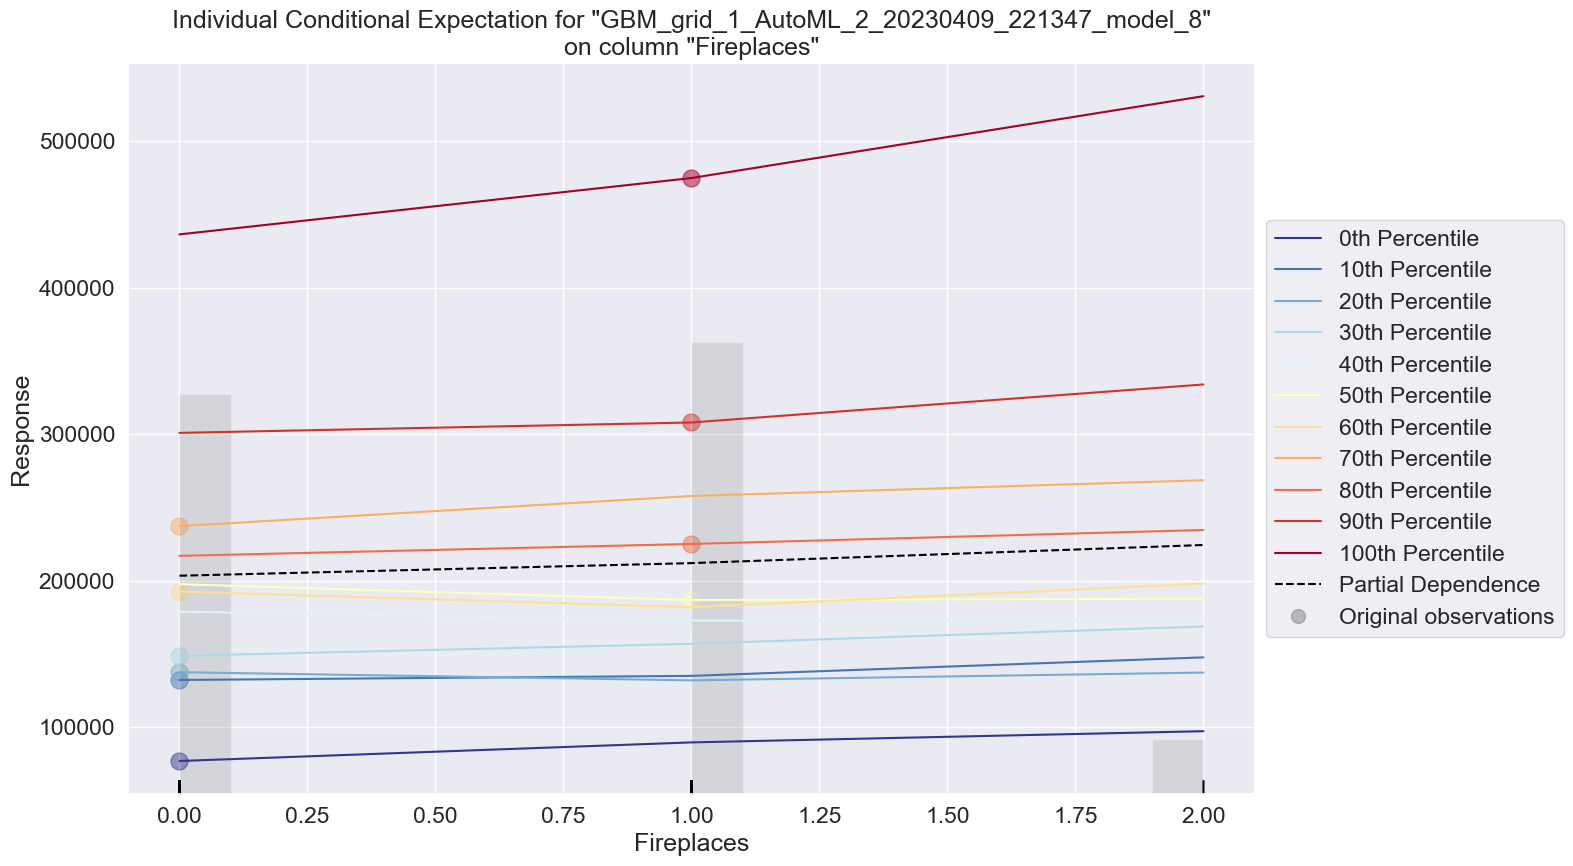

In [50]:
exa = aml1.explain(df1_test)

# Hyperparameter Tuning

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [51]:
s = dfpd1['SalePrice']

t = dfpd1.drop(['SalePrice'], axis = 1)

In [52]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [53]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [54]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [55]:
random_rf.best_params_

{'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 1100}

# WHAT HAVE WE LEARNT FROM ABOVE:

-Based on the provided regression results, the overall relationship between the dependent variable (SalePrice) and the independent variables included in the model is significant.

-The R-squared value of 0.784 indicates that the model explains 78.4% of the variance in the dependent variable, and the F-statistic of 268.8 with a Prob (F-statistic) value of 0.00 suggests that the overall model is significant at a 5% level of significance.

-However, to determine the significance of individual predictors, we need to look at their p-values.

-The p-value for each predictor shows the probability of observing a relationship as strong as or stronger than the observed relationship, assuming there is no true relationship between the predictor and the dependent variable.

-Predictors with p-values less than 0.05 are typically considered statistically significant, meaning we can reject the null hypothesis that there is no relationship between the predictor and the dependent variable.

-Looking at the table, we can see that the predictors Lot_Frontage, Lot_Area, House_Style, Overall_Qual, Overall_Cond, Gr_Liv_Area, Half_Bath, Kitchen_AbvGr, TotRms_AbvGrd, Fireplaces, and Garage_Area have p-values less than 0.05, indicating they are statistically significant predictors of SalePrice in this model.

-On the other hand, predictors with p-values greater than 0.05, such as Street, MS_SubClass, Bldg_Type, Full_Bath, Bedroom_AbvGr, Mo_Sold, and Yr_Sold, are not statistically significant at the 0.05 level in this model.

It's important to note that significance levels can vary depending on the context and the research question, and that a predictor with a non-significant p-value in one model may become significant in another model that includes different predictors or different functional forms of the predictors.

here is multicollinearity present in the variables. Multicollinearity occurs when two or more independent variables in a multiple regression model are highly correlated with each other. This can be seen from the Variance Inflation Factor (VIF) values of the variables, which are shown in the table.

A commonly used rule of thumb is that a VIF value of 5 or greater indicates the presence of multicollinearity. In this case, we can see that several variables have VIF values that exceed this threshold, such as House_Style, Overall_Qual, Overall_Cond, Year_Built, Gr_Liv_Area, Bedroom_AbvGr, Kitchen_AbvGr, TotRms_AbvGrd, and Yr_Sold.

3.In the multivariate models are predictor variables independent of all the other predictor variables?

In a multiple regression model, the predictor variables are assumed to be independent of each other, meaning that there is no multicollinearity present.

To test for multicollinearity, we can calculate the Variance Inflation Factor (VIF) for each predictor variable. The VIF measures the degree of multicollinearity between each predictor variable and the other variables in the model. A VIF value of 1 indicates no multicollinearity, while a value greater than 1 indicates some degree of multicollinearity.

Based on the given VIF values, we can see that some predictor variables have high VIF values, indicating some degree of multicollinearity between them and the other predictor variables in the model. Specifically, MS_SubClass, Lot_Frontage, Bldg_Type, House_Style, Overall_Qual, Overall_Cond, Gr_Liv_Area, Full_Bath, Bedroom_AbvGr, Kitchen_AbvGr, and TotRms_AbvGrd all have VIF values greater than 5, with Overall_Qual having a particularly high VIF value of almost 98.

Therefore, we cannot conclude that all predictor variables are independent of each other.

Regularization is a method for fine-tuning the random noise function by including an extra term. This additional term regulates the function's excessive fluctuation so that neither the coefficients nor the target value prediction for test data are drastically impacted. Regularization is primarily used to reduce validation loss and attempt to increase model correctness. Ridge Regularization was applied to the training set of this model. Root Mean Square Error (RMSE) and R2 were reported to be calculated twice, once when regularization was not done and once when it was. In both instances, the values were the same. Therefore, it can be inferred that regularization is ineffective for this model.

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are: n_estimators': 300, 'min_samples_split': 5, 'max_depth': 200

# LETS LOOK AT MODEL INTERPRETIBILITY:

In [67]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install h2o
!pip install sklearn>=0.2


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


ModuleNotFoundError: No module named 'yellowbrick'

In [70]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [72]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

0


In [73]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:54498..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.16.1+1-LTS-1, mixed mode)
  Starting server from C:\Users\Tanvi\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Tanvi\AppData\Local\Temp\tmp_v2ghk1m
  JVM stdout: C:\Users\Tanvi\AppData\Local\Temp\tmp_v2ghk1m\h2o_Tanvi_started_from_python.out
  JVM stderr: C:\Users\Tanvi\AppData\Local\Temp\tmp_v2ghk1m\h2o_Tanvi_started_from_python.err
  Server is running at http://127.0.0.1:54498
Connecting to H2O server at http://127.0.0.1:54498 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    2 months and 1 day
H2O_cluster_name:           H2O_from_python_Tanvi_j8e21n
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.926 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54498
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.0 final
--------------------------  -----------------------------

In [74]:
ames_df = pd.read_csv(
    "https://raw.githubusercontent.com/Tanvivalkunde/dsem-ass-2/main/ames%20housing.csv"
)  # Reading CSV file into Pandas DataFrame"

In [75]:
X = ames_df.drop(['SalePrice','Street','Year_Built','Yr_Sold','Mo_Sold'], axis=1) # Training Feature
Y = ames_df['SalePrice']  # Target

In [76]:
from sklearn.model_selection import train_test_split
!pip install shap
import shap

(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Fitting a Linear Model

In [77]:
!pip install sklearn
import sklearn

from sklearn import linear_model
linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


LinearRegression()

In [78]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/Tanvivalkunde/dsem-ass-2/main/ames%20housing.csv")

In [79]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('SalePrice ~ MS_SubClass + Lot_Frontage + Lot_Area + Bldg_Type + Year_Built + House_Style + Overall_Qual +Overall_Cond + Gr_Liv_Area +Full_Bath + Half_Bath +Bedroom_AbvGr +Kitchen_AbvGr+ TotRms_AbvGrd +Fireplaces+ Garage_Area +Mo_Sold + Yr_Sold + Street' , data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:42:26   Log-Likelihood:                -16272.
No. Observations:                1351   AIC:                         3.258e+04
Df Residuals:                    1331   BIC:                         3.269e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.391e+06   1.78e+06     -0.780      0.436   -4.89e+06    2.11e+06
Street[T.Pave]  5448.6768   2.44e+04      0.224      0.823   -4.24e+04    5.33e+04
MS_SubClass      -59.8839     87.620     -0.683      0.494    -231.773     112.005
Lot_Frontage    -194.0745     64.262     -3.020      0.003    -320.140     -68.009
Lot_Area           0.5046      0.172      2.929      0.003       0.167       0.843
Bldg_Type      -2431.8617   2543.288     -0.956      0.339   -7421.152    2557.429
Year_Built       453.1218    127.336      3.558      0.000     203.321     702.922
House_Style      -3.3e+04   5721.293     -5.767      0.000   -4.42e+04   -2.18e+04
Overall_Qual    2.575e+04   1594.156     16.152      0.000    2.26e+04    2.89e+04
Overall_Cond    6058.0928   1828.967      3.312      0.001    2470.122    9646.064
Gr_Liv_Area       71.7027      5.500     13.037      0.000      60.913      82.493
Full_Bath      -3527.9032   3854.867     -0.915      0.360   -1.11e+04    4034.374
Half_Bath       8737.2993   3848.740      2.270      0.023    1187.042    1.63e+04
Bedroom_AbvGr  -2444.3815   2502.442     -0.977      0.329   -7353.542    2464.779
Kitchen_AbvGr  -3.181e+04   9511.982     -3.344      0.001   -5.05e+04   -1.31e+04
TotRms_AbvGrd   2487.0371   1551.815      1.603      0.109    -557.233    5531.308
Fireplaces      1.007e+04   2324.070      4.334      0.000    5513.175    1.46e+04
Garage_Area       69.6240      9.401      7.406      0.000      51.181      88.067
Mo_Sold         -143.5866    418.290     -0.343      0.731    -964.165     676.992
Yr_Sold          209.2443    877.939      0.238      0.812   -1513.050    1931.539
==============================================================================
Omnibus:                      797.719   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73485.489
Skew:                          -1.849   Prob(JB):                         0.00
Kurtosis:                      38.941   Cond. No.                     2.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ordinary least squares (OLS) regression The relationship between one or more independent variables and a dependent variable is estimated using the ordinary least squares (OLS) regression statistical method of analysis, which minimizes the sum of the squares in the difference between the observed and predicted values of the dependent variable

Here are some conclusions that can be drawn from the regression results:

The output shows the results of a multiple linear regression analysis of the SalePrice of 1351 homes based on 19 predictor variables. The model has an R-squared value of 0.786, indicating that approximately 78.6% of the variability in SalePrice can be explained by the predictor variables.

The coefficient estimates for each predictor variable and the intercept are shown in the "coef" column. A positive coefficient indicates a positive association between the predictor variable and SalePrice, while a negative coefficient indicates a negative association. The "std err" column shows the standard error of the coefficient estimates, and the "t" column shows the t-value for the hypothesis test that the coefficient is equal to zero. The "P>|t|" column shows the p-value for this test, indicating the strength of evidence against the null hypothesis that the coefficient is equal to zero. A p-value less than 0.05 suggests that the variable is statistically significant in predicting SalePrice.

Based on the output, some variables appear to have a statistically significant association with SalePrice, including Lot_Frontage, Lot_Area, Year_Built, House_Style, Overall_Qual, Overall_Cond, Gr_Liv_Area, Half_Bath, Kitchen_AbvGr, Fireplaces, and Garage_Area.

However, some variables such as Street, MS_SubClass, Bldg_Type, Full_Bath, Bedroom_AbvGr, TotRms_AbvGrd, Mo_Sold, and Yr_Sold do not seem to have a statistically significant association with SalePrice, as indicated by their high p-values.

The Durbin-Watson value of 1.775 suggests that there is no significant autocorrelation among the residuals, and the Omnibus test indicates that the residuals are not normally distributed. The skewness and kurtosis values also suggest that the residuals are not normally distributed.

Overall, the regression model appears to have some significant predictor variables, but the distribution of the residuals may suggest some limitations to the model's predictive ability

# Fit Tree Based Model

In [80]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

In [81]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

# Visualization of Nodes for the purpose of explainability
plt.figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=x_train.columns,
    filled=True,
    precision=2,
    rounded=True,
)


<Figure size 2560x1920 with 0 Axes>

In [82]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Tanvi/Downloads/windows_10_msbuild_Release_graphviz-7.1.0-win32.zip/Graphviz'

In [83]:
!pip install pydot Graphviz


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import pydot